# 1. Analysis & Planning Stage


# General Overview

We consider the problem of determining some areas in NYC, from which people pay more tips to NYC cabs. Therefore, we are interested in defining the meaning of "pay more tips" as well as "how much more is". To devise this solution we are using open sourced data from the NYC Taxi and Limousine Commission, which includes valuable information about all trips completed by cabs in NYC in June 2015. The structure of our solution focus on performing four core stages comprising: 1) Analysis and Planning 2) Development and Optimisation 3) Conclusion and Report and 4) Release and Presentation. Thus, rather than conducting full-fledged research, we are aimed at communicating our perspective of a possible solution to this ambitious problem by using some machine learning techniques, and discussing the substantial benefits and disavantages of the approach developed.



# 1.1 Dataset

As mentioned before, the dataset consists of information about 12,324,935 trips completed by cabs in NYC during June 2015. The raw data, contained in a .csv file, includes 19 fields in total with data like pickup time, number of passengers, tip amounts, and so on.  


# 1.2 Main Tools

We are using Python through Jupyter as the main programming language to build our solution. Subsequently, we take advantage of the following libraries:

    * Petl
    * matplotlib
    * Seaborn
    * scikit-learn
    * Pandas
    * NumPy
    
Similarly, we are going to use Github to release our solution in the repository https://github.com/Riccocez/NYC-Taxi-Tips.git


 

# 1.3 Exploration of  the dataset
 

We start the solution of the problem by analysing the raw data contained in the dataset. With this analysis we want to find possible inconsistencies, typos or non-informative data that we can remove when cleaning up the dataset.

# 1.3.1 Raw Data Visualisation and Filtering

First we are going to take a look at some of the trips contained in the raw data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [36]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import random

from petl import fromcsv, look, fieldnames, values, head, tail

import seaborn as sns

from mpl_toolkits.basemap import Basemap

import os

Therefore, we get the size of the dataset: 12,324,935 entries


In [3]:
raw_data = pd.read_csv('yellow_tripdata_2015-06.csv', skipinitialspace=True)
print "Number of trips registered: ", len(raw_data)

Number of trips registered:  12324935


And we also get the references that characterise each trip. By analysing the dataset, we realise that we have 19 sorts of data:

     1) VendorID
     2) tpep_pickup_datetime
     3) tpep_dropoff_datetime
     4) passenger_count
     5) trip_distance
     6) pickup_longitude
     7) pickup_latitude
     8) RateCodeID
     9) store_and_fwd_flag
    10) dropoff_longitude
    11) dropoff_latitude
    12) payment_type
    13) fare_amount
    14) extra
    15) mta_tax
    16) tip_amount
    17) tolls_amount
    18) improvement_surcharge
    19) total_amount

In [4]:
raw_data.head(n=5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0,0.5,0.00,0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0,0.5,1.00,0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0,0.5,2.20,0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0,0.5,2.86,0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0,0.5,0.00,0,0.3,10.30


Considering the numeric type of data contained in the dataset, we perform a simple statistical analysis to determine informative outputs like mean, standard deviation, as well as maximum and minimum values. 

The purpose of this analysis is to:
    
       1) Determine the range of tips: Which apparently comprises between $-80.00 to $980.91. 
       2) Find possible outliers: We have already detected some of them ($-80.00 and $980.91 don't seem to be tip amounts commonly paid for an average passenger).
       3) Discover some potential correlations in data: Other types of information like fare_amount and trip distance can be potentially correlated. They can be auxiliary references to filter possible outliers within the dataset.

In [5]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000,12324935.000000
mean,1.523565,1.681898,11.829076,-72.913847,40.166867,1.041832,-72.944737,40.184784,1.379517,13.204085,0.323405,0.497618,1.736538,0.316152,0.299721,16.378268
std,0.499444,1.335180,7678.550287,8.796762,4.843162,0.581957,8.669562,4.777574,0.499528,106.076575,0.480415,0.042148,2.637613,1.542573,0.012164,106.382788
min,1.000000,0.000000,0.000000,-759.233337,-67.136963,1.000000,-754.166687,-16.177874,1.000000,-300.000000,-30.500000,-0.500000,-80.000000,-14.000000,-0.300000,-300.000000
25%,1.000000,1.000000,1.010000,-73.991898,40.736141,1.000000,-73.991302,40.734627,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000
50%,2.000000,1.000000,1.750000,-73.981537,40.753235,1.000000,-73.979622,40.753799,1.000000,9.500000,0.000000,0.500000,1.160000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.230000,-73.966461,40.767929,1.000000,-73.962479,40.768787,2.000000,15.000000,0.500000,0.500000,2.350000,0.000000,0.300000,18.300000
max,2.000000,9.000000,10083318.000000,149.028534,69.702576,99.000000,125.535568,483.450012,5.000000,335413.690000,652.420000,60.350000,980.910000,900.970000,0.700000,335414.490000


The statistical analysis shows some extreme values that are very unlikely to be part of a given distribution. The most critical outliers are in:
    
    1) passenger_count
    2) trip_distance
    3) payment_type
    4) fare_amount
    5) extra
    6) mta_tax
    7) tip_amount
    8) tolls_amount
    9) dropoff_latitude
  
We are going to graphically analyse these fields to realise which values are outliers, and consequently, altering the distribution of the dataset.



# 1.3.2 Tip Amount Distribution

We consider tip_amount is clearly a reasonable reference to based our analysis. Therefore, this feature will be analysed in a 2D plot. The y-axis represents the corresponding tip amount to each of the 12 million trips contained in the dataset, which are represented in the x_axis.

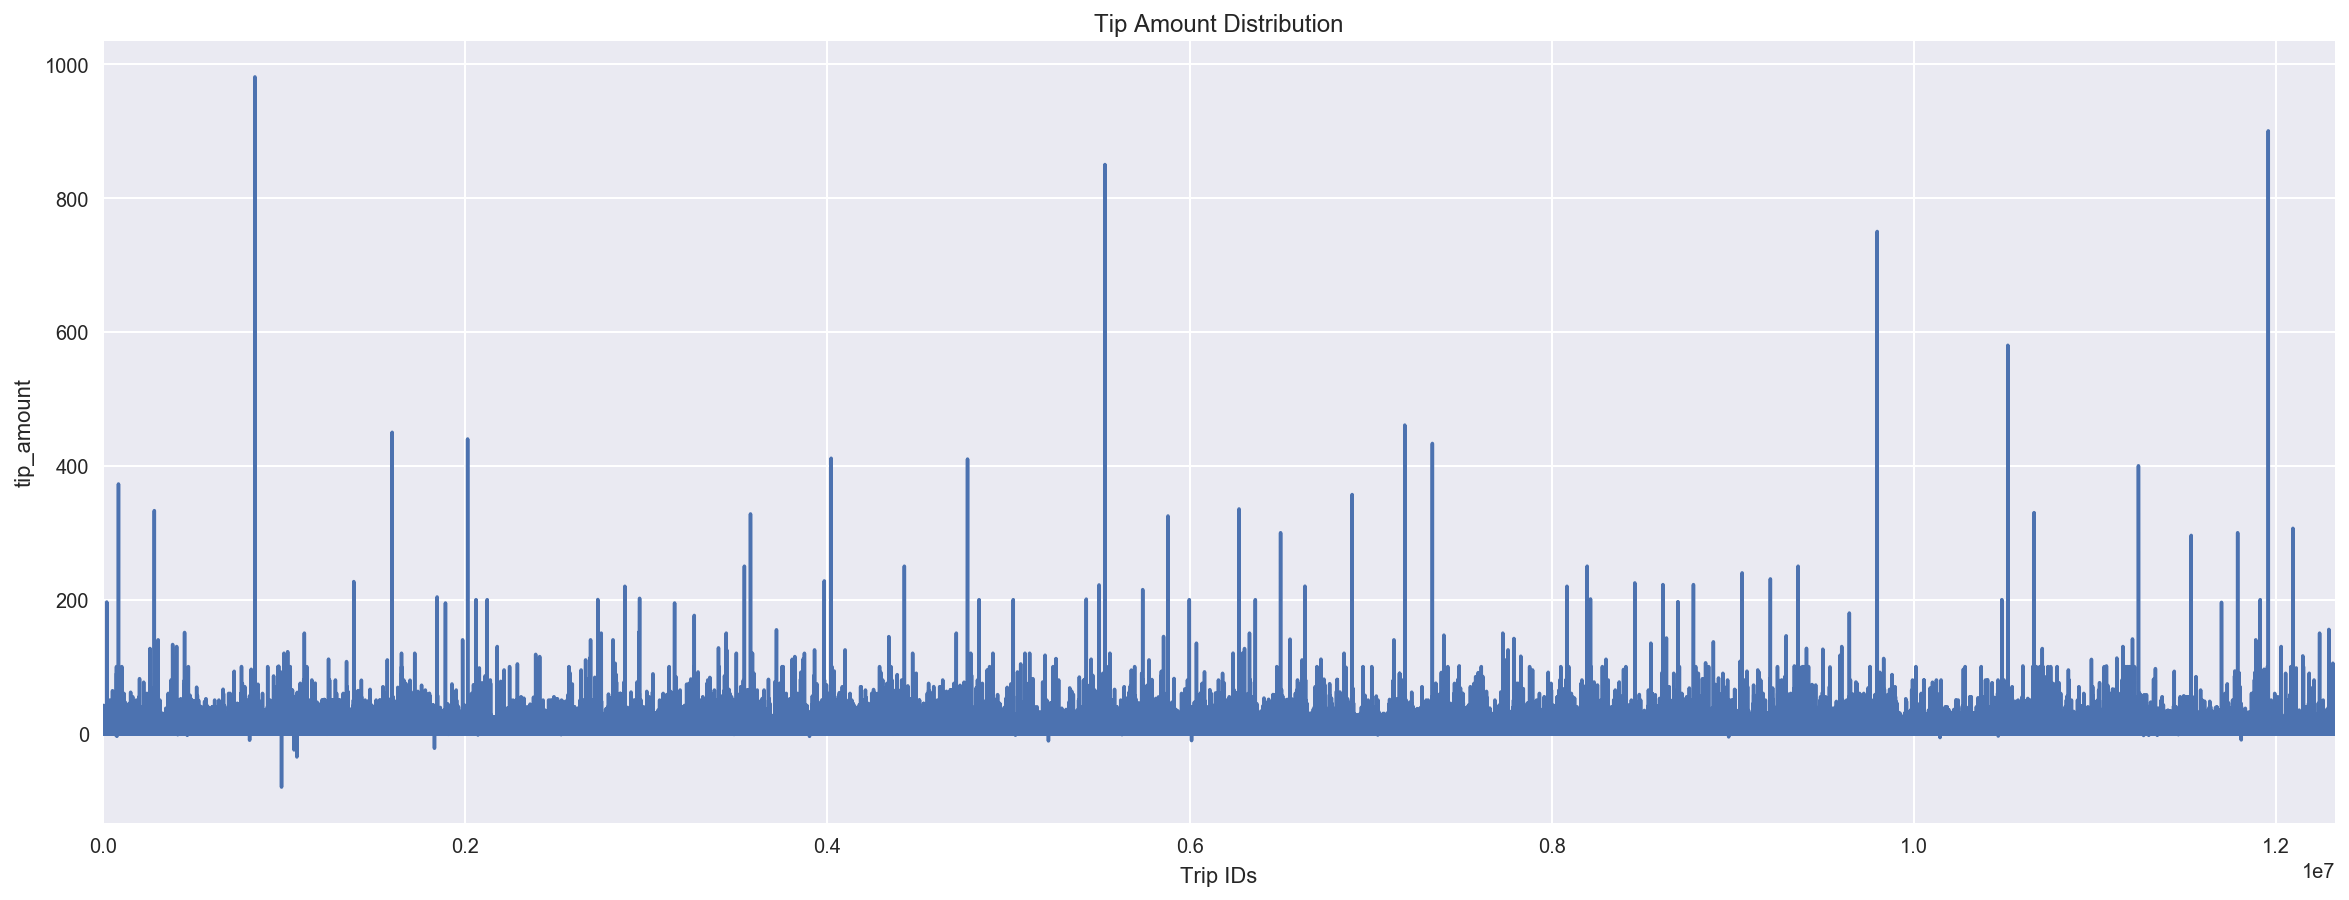

In [6]:
tip_amounts = raw_data['tip_amount']

plt.figure(figsize = (20,7))
plt.ylabel('tip_amount')
plt.title('Tip Amount Distribution')
plt.xlabel('Trip IDs')

tip_amounts.plot()

Based on this plot, we consider that highly potential outliers might be those not included in the range from \$0 to \$200. Nevertheless, we want to make sure that this assumption is correct and that it keeps describing the most representative values of the tip_amount distribution. 

By analysing a more representative behaviour, we can have a better generalisation of the distribution which can be reflected in a good prediction performance of the model we are going to build. In this manner, our approach to explore the data is based on analysing and obtaining the values of a field -for instance tip amount- with higher frequency within the entire set of trips. 

The range we define to capture the most relevant trips comprises tip amounts between \$0 and \$30.

Note: The range established to filter outliers is considering some offset in order to avoid analysing a very particular range of values that could lead to overfit issues during the training and testing stage. We are going to use this technique throughouth the analysis of the raw dataset.

Text(0,0.5,u'Number of trips')

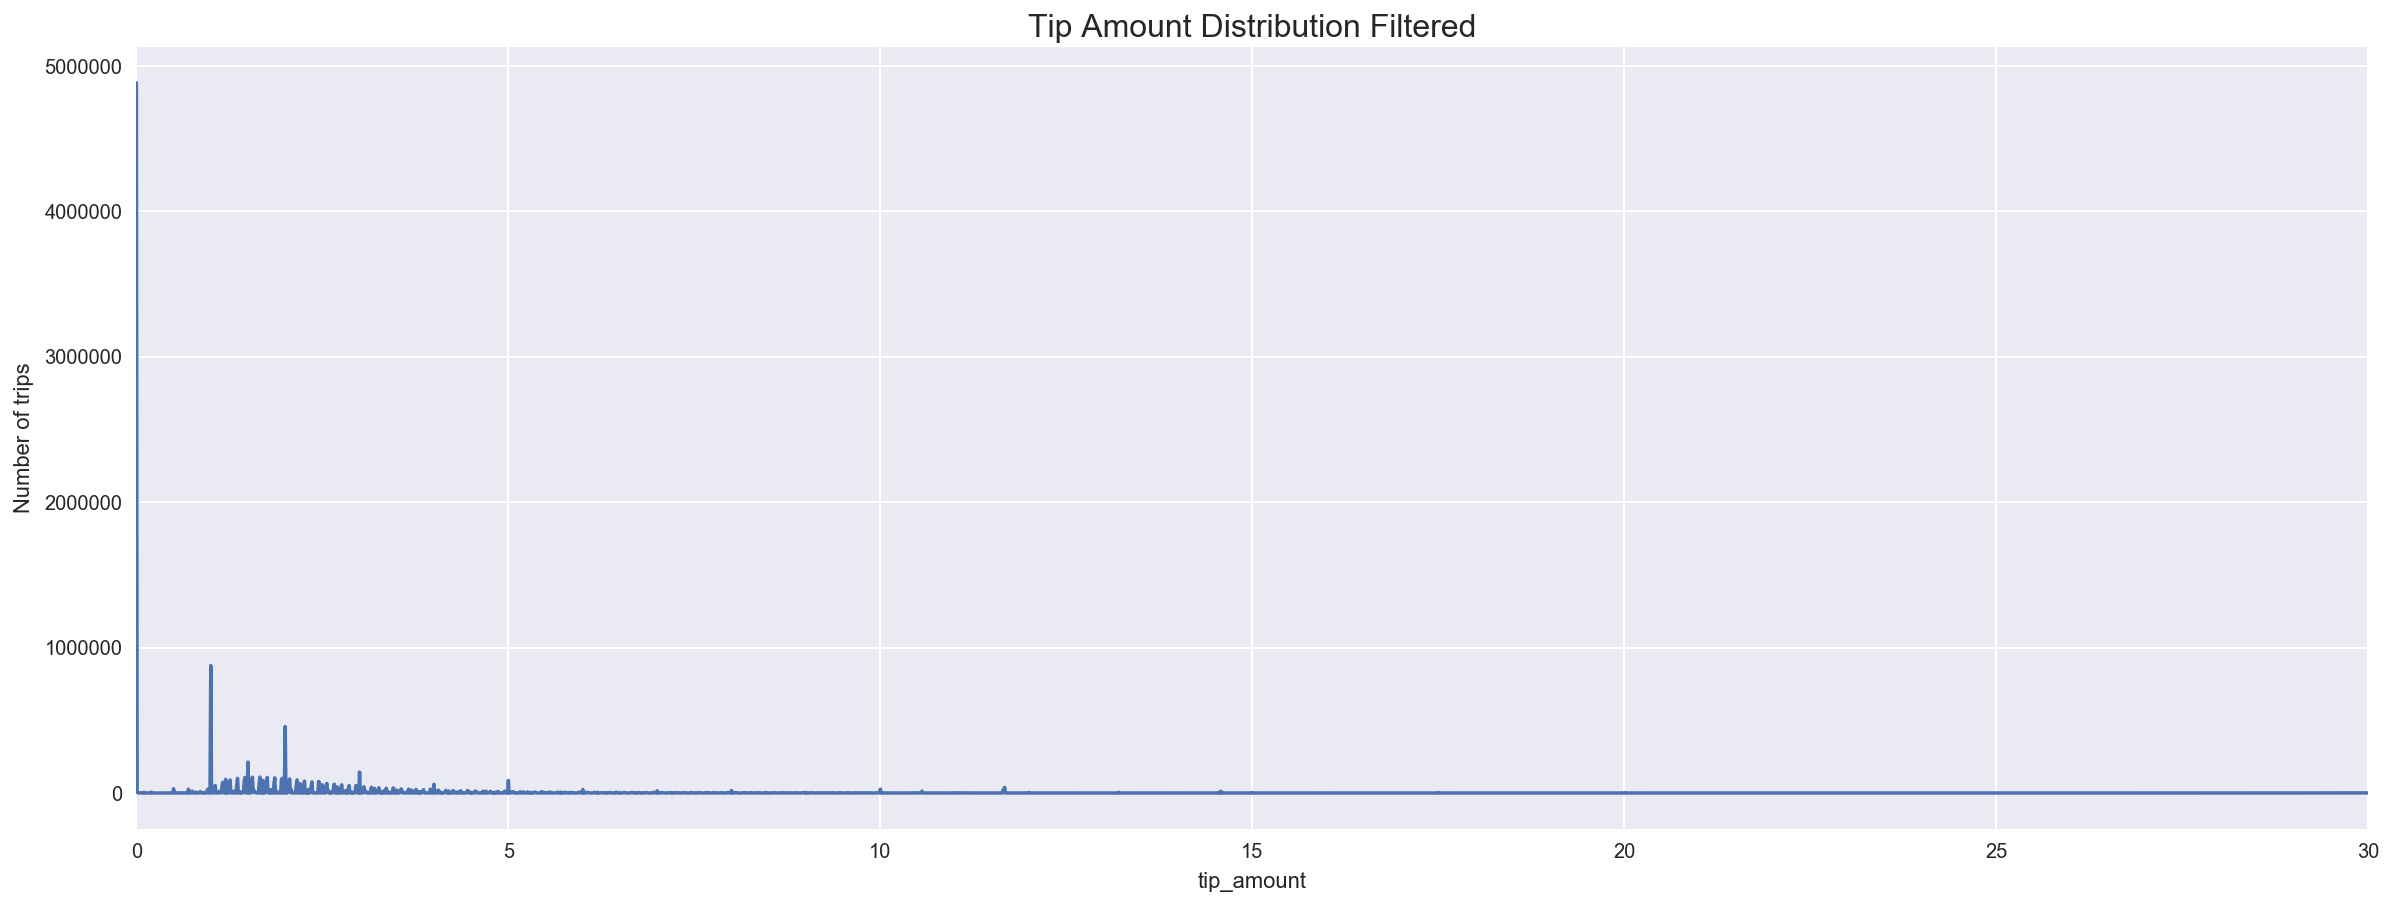

In [7]:
filtered_data = raw_data.loc[(raw_data.tip_amount >= 0 ) & (raw_data.tip_amount <= 30)]
tip_filtered = filtered_data.groupby(['tip_amount']).size().plot(figsize = (20,7))

plt.ylabel('tip_amount')
plt.title('Tip Amount Distribution Filtered', fontsize = 16)
plt.ylabel('Number of trips')


# 1.3.3 Fare Amount Distribution

Now it is time to analyse the fare amount distribution. 
We consider a very likely fare amount commonly paid may vary between $0 to \$100. Then, after this filter it is clear that we have a the most important trips of this distribution.


Text(0.5,1,u'Fare Amount Distribution Filtered')

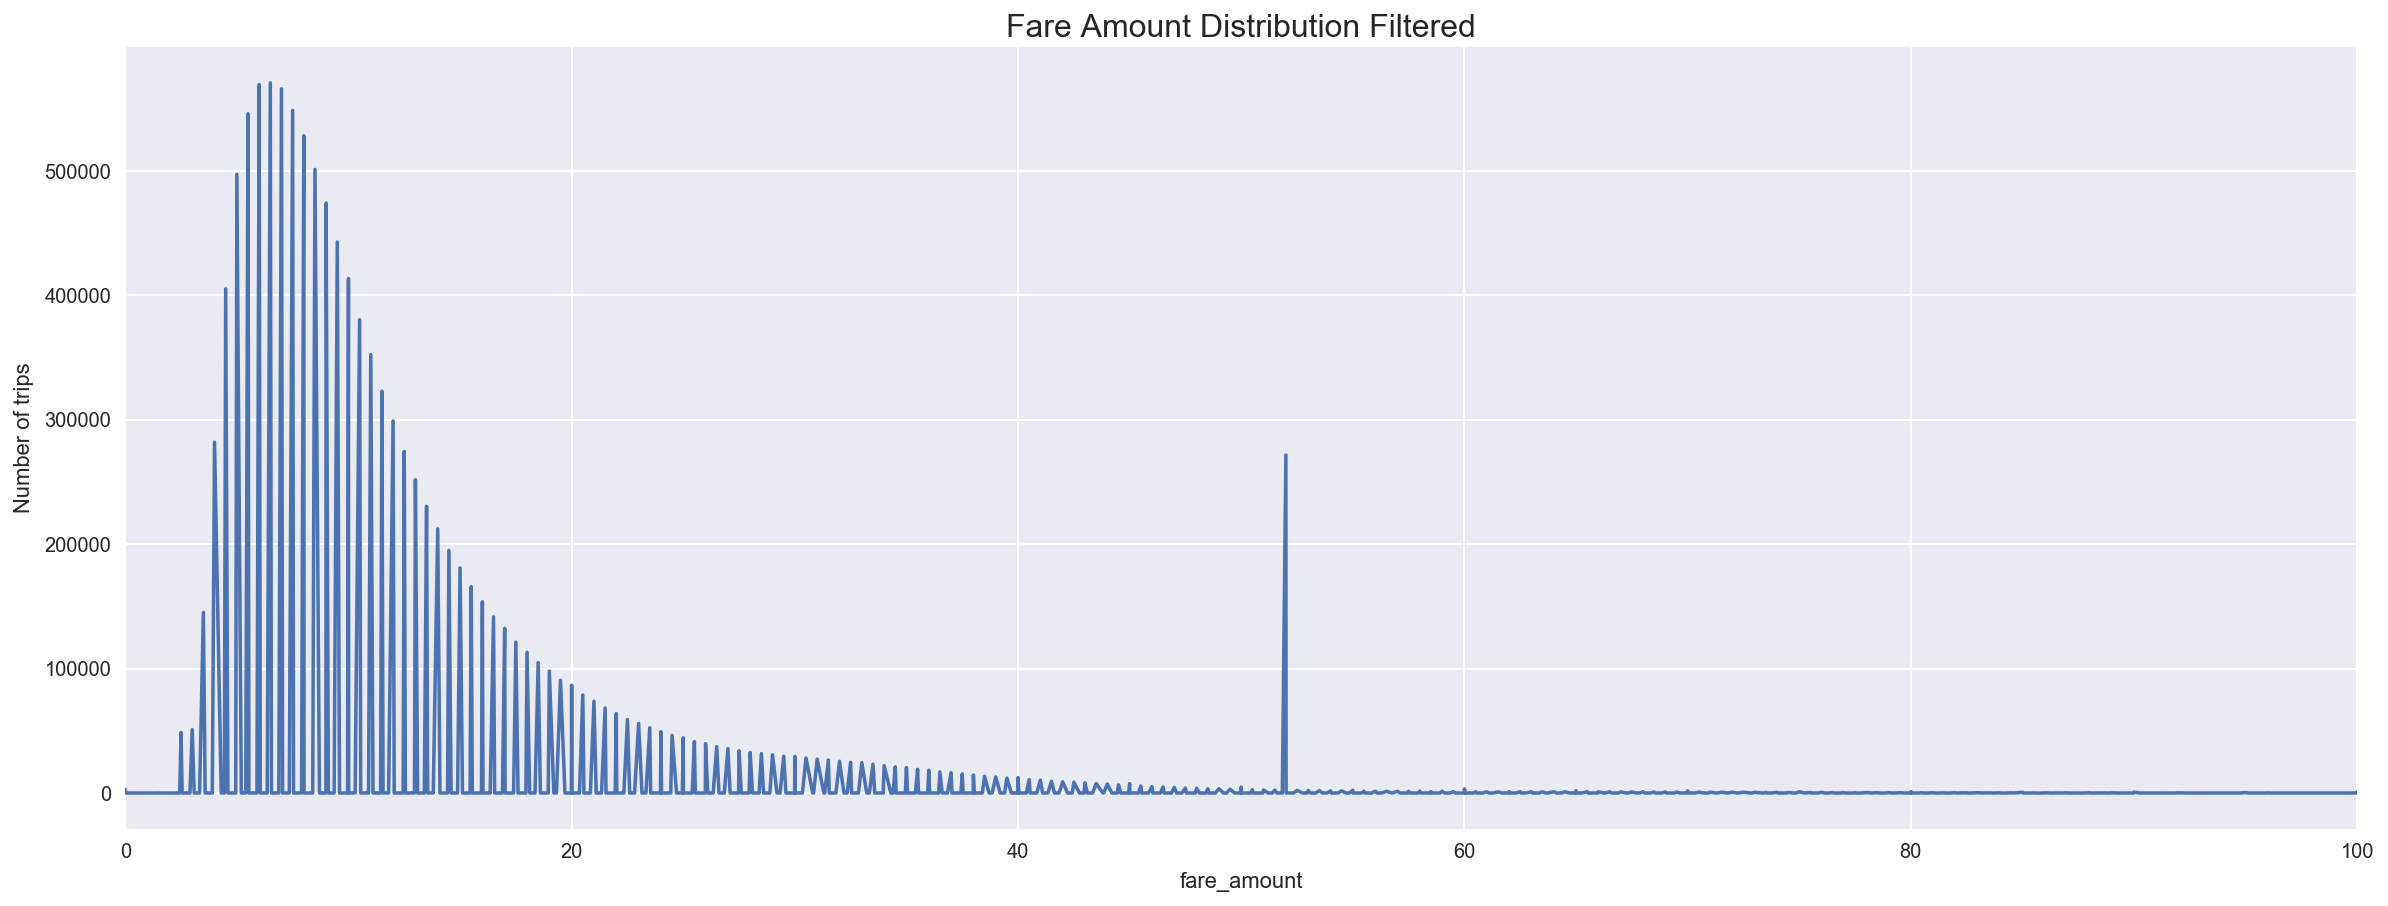

In [8]:
fare_data = filtered_data.loc[(filtered_data.fare_amount >= 0 ) & (filtered_data.fare_amount <= 100)]
fare_filtered = fare_data.groupby(['fare_amount']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Fare Amount Distribution Filtered', fontsize = 16)

Implementing this new filter to the dataset, we notice that we have discriminated over 10k number of trips.

In [9]:
print 'Number of trips filtered: ', len(filtered_data) - len(fare_data) 

Number of trips filtered:  10846


# 1.3.4 Trip Distance Distribution

The relevant distance travelled on average from this distribution relies between more than 0 up to 40 miles as shown in the figure below.

Text(0.5,1,u'Trip Distance Distribution Filtered')

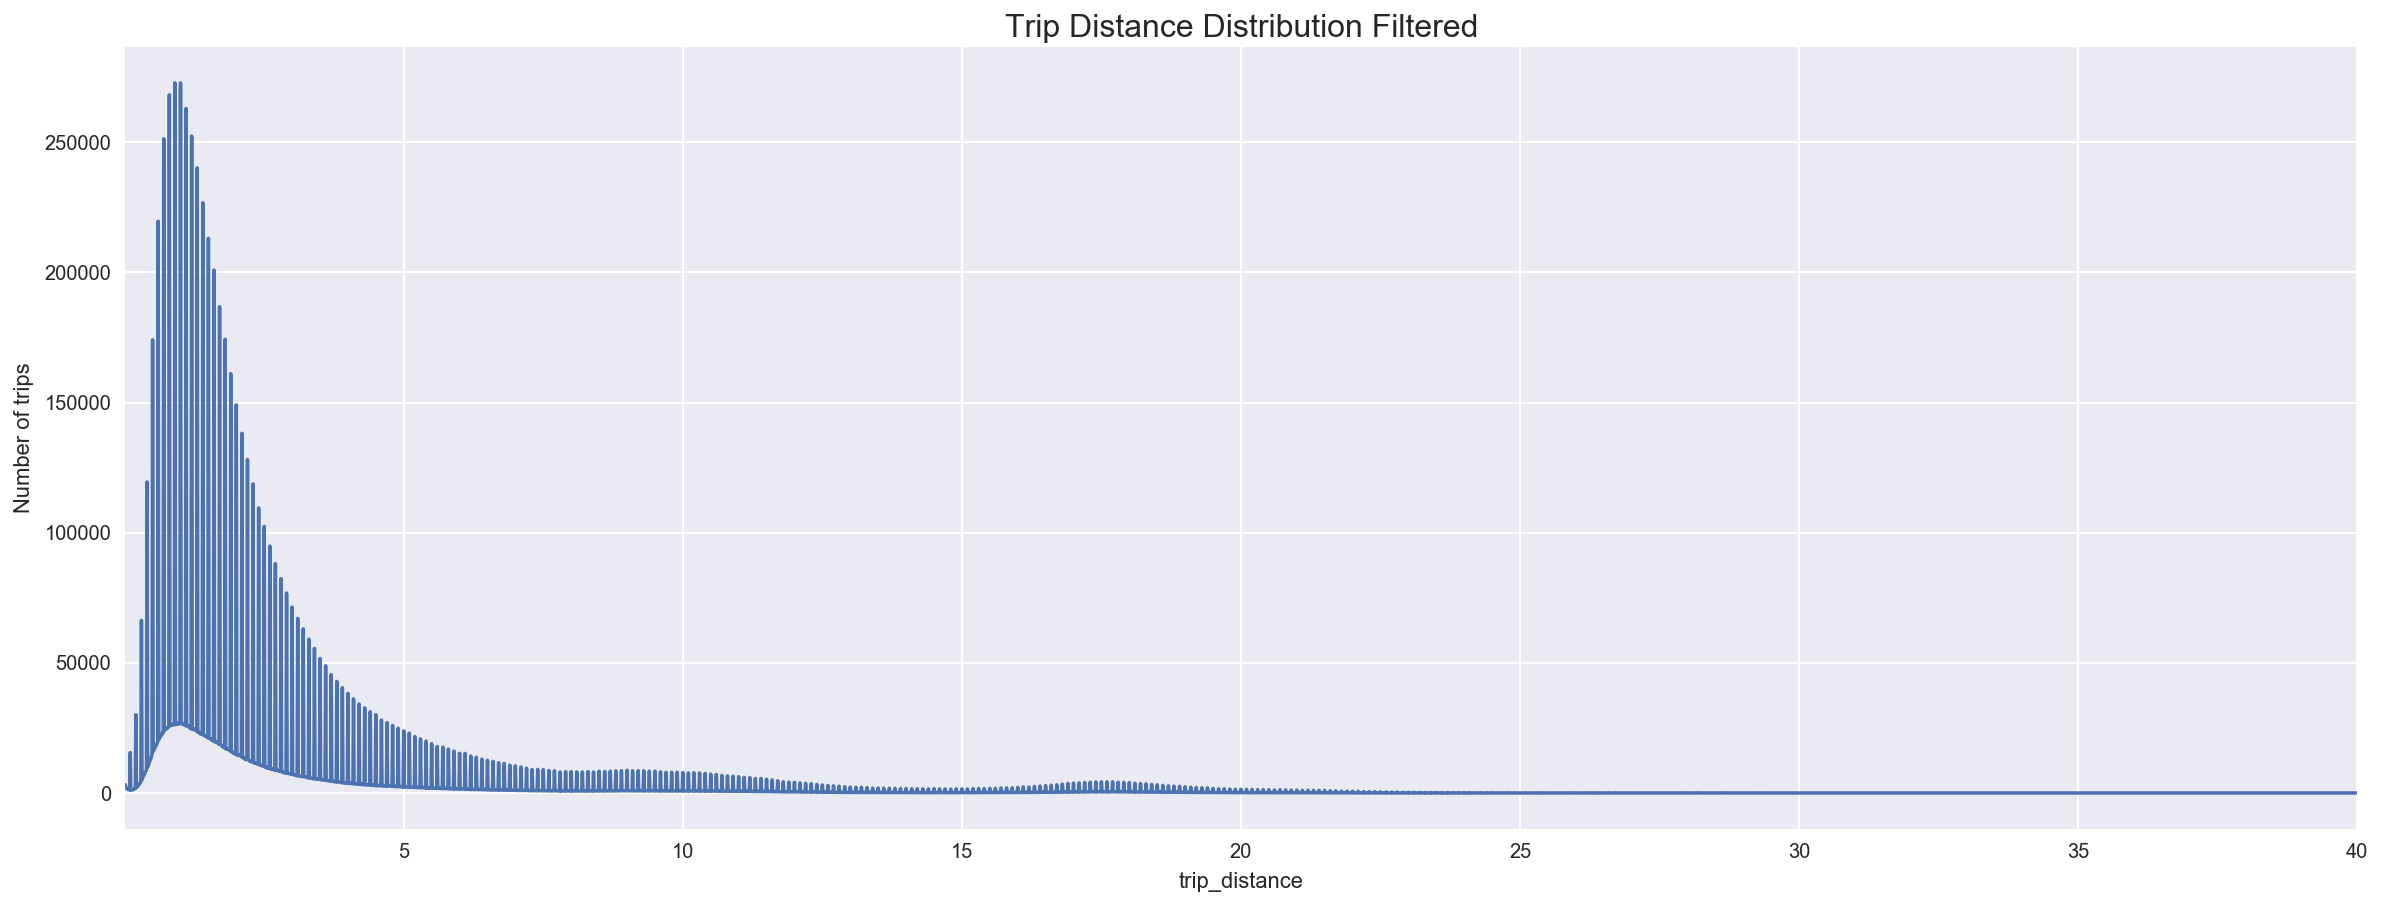

In [10]:
trip_data = fare_data.loc[(fare_data.trip_distance > 0 ) & (fare_data.trip_distance <= 40)]
trip_filtered = trip_data.groupby(['trip_distance']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Trip Distance Distribution Filtered', fontsize = 16)

A substantial filter of 72k trips have been performed.

In [11]:
 print 'Number of trips filtered: ', len(fare_data) - len(trip_data)

Number of trips filtered:  72881


# 1.3.5 Tolls Amount Distribution

Despite most of the trips have paid around \$6 or nothing (\$0) for tolls, we capture trips that are in the range of \$0 to \$20 as this seems to describe the common amounts paid.

Text(0.5,1,u'Tolls Amount Distribution Filtered')

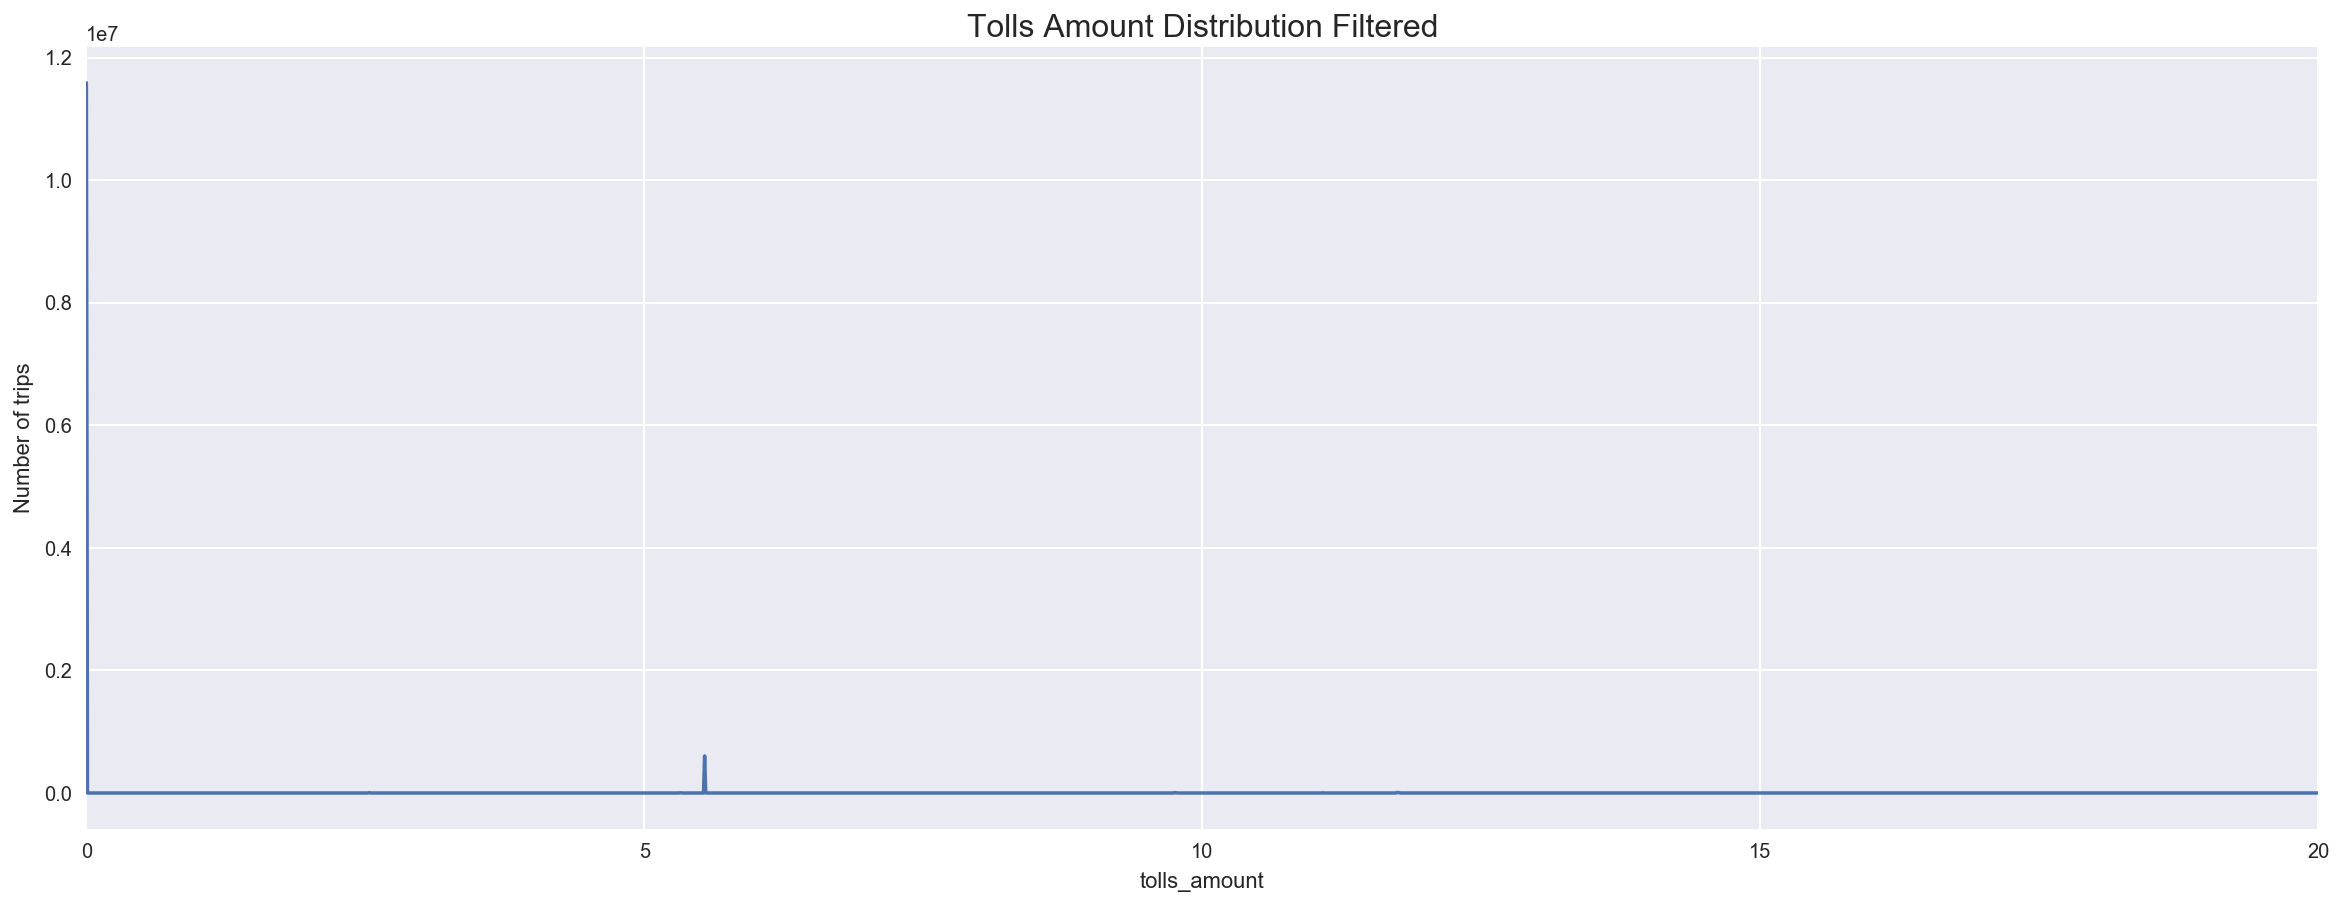

In [12]:
tolls_data = trip_data.loc[(trip_data.tolls_amount >=0 ) & (trip_data.tolls_amount <= 20)]
tolls_filtered = tolls_data.groupby(['tolls_amount']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Tolls Amount Distribution Filtered', fontsize = 16)

This filter discriminates few trips from the dataset.

In [13]:
print 'Number of trips filtered: ', len(trip_data) - len(tolls_data)

Number of trips filtered:  794


# 1.3.6 Extra Distribution


From the distribution depicted below it is noticeable that most of the trips have paid from \$0 to \$50.

Text(0.5,1,u'Extra Distribution Filtered')

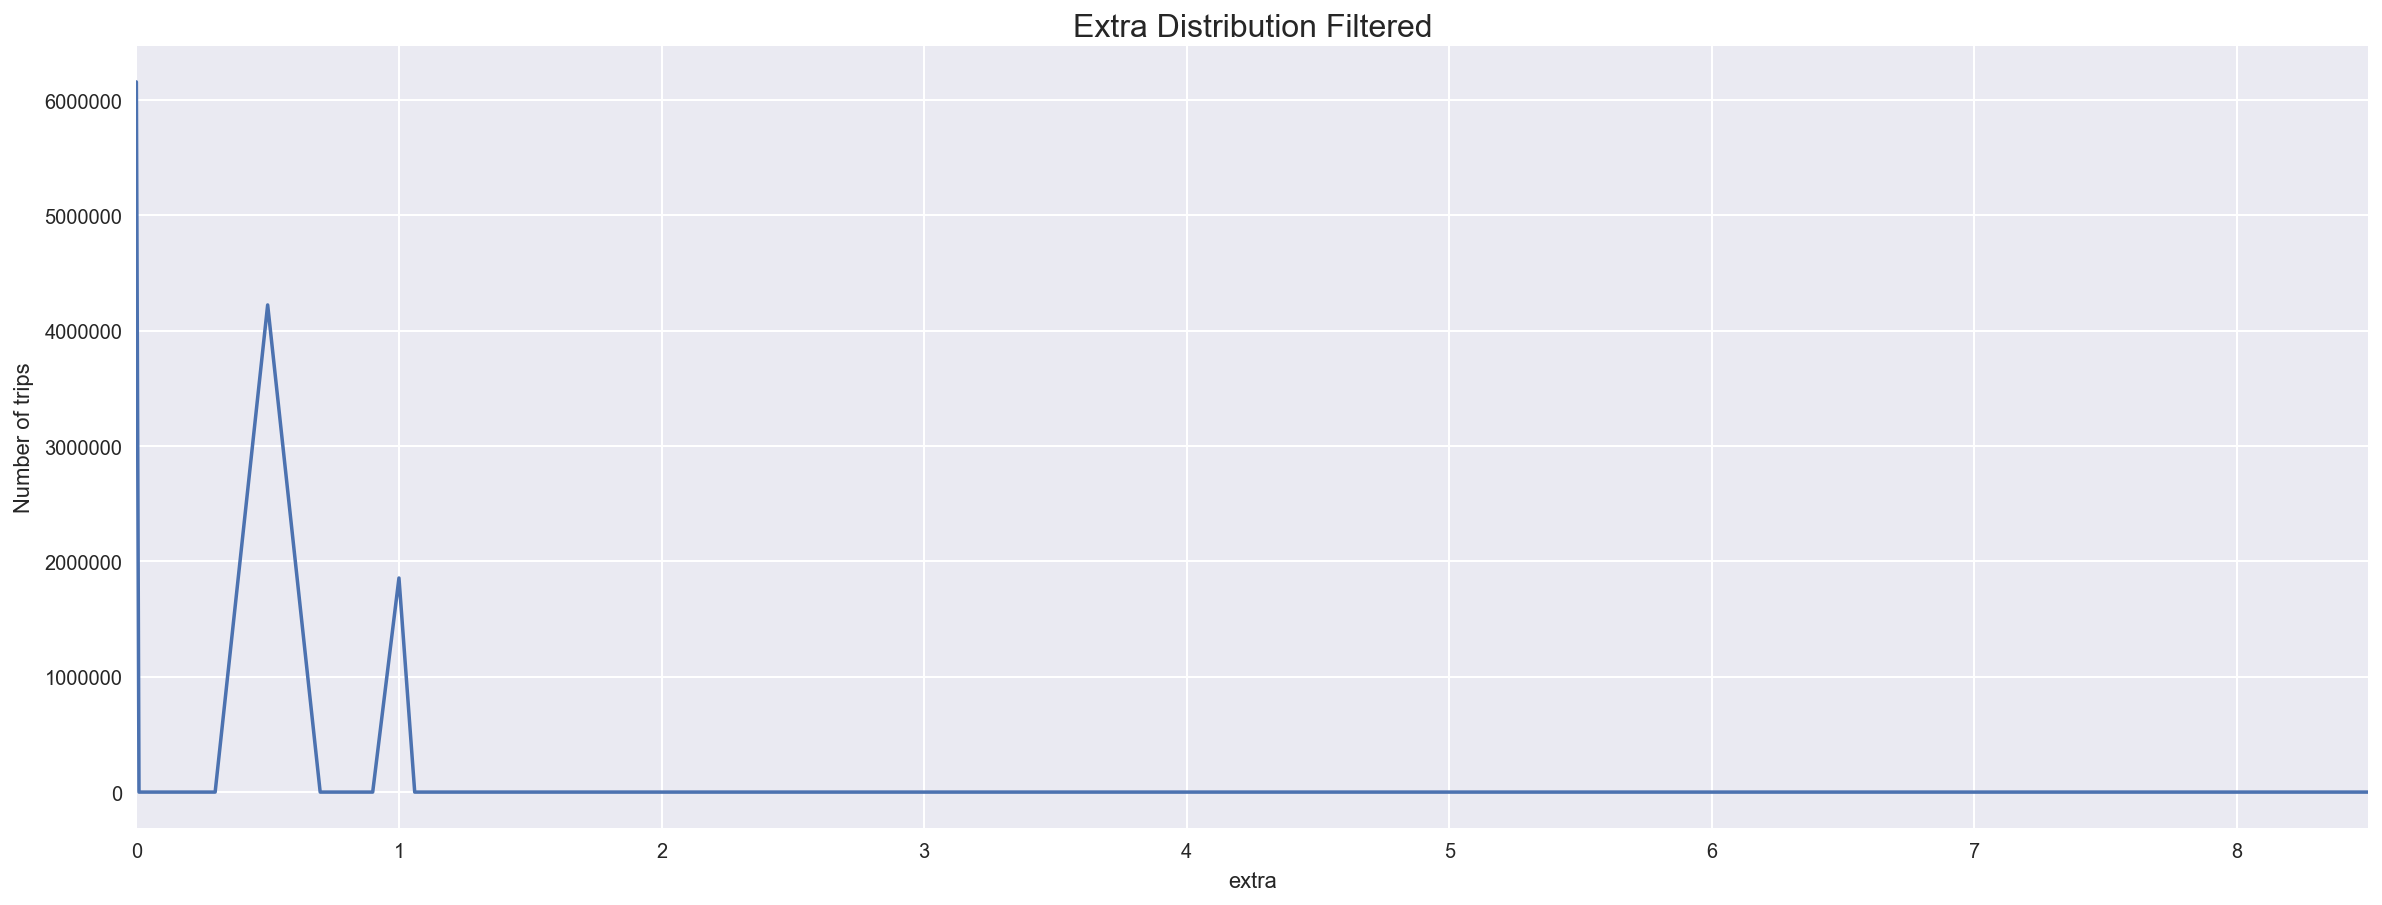

In [14]:
extra_data = tolls_data.loc[(tolls_data.extra >=0 ) & (tolls_data.extra <= 10)]
extra_filtered = extra_data.groupby(['extra']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Extra Distribution Filtered', fontsize = 16)

Number of outliers filtered from the extra distribution are 17 

In [15]:
print 'Number of outliers: ', len(tolls_data) - len(extra_data)

Number of outliers:  17


# 1.3.7 Passenger Count Distribution

According to the statistical analysis explained in 1.3.1 we can notice that the number of passengers varies from 1 to 9 passengers. However, the NYC Taxi & Limousine Commision states in their website (http://www.nyc.gov/html/tlc/html/faq/faq_pass.shtml#3) that the number of passengers that can fit a yellow taxicab is by law maximum 5 people, except in the case where an additional passenger must be accepted if he/she is under the age of 7.

Therefore it is clear that a trip in a cab must be travelled from 1 up to 6 passengers.


Text(0.5,1,u'Passenger Count Distribution Filtered')

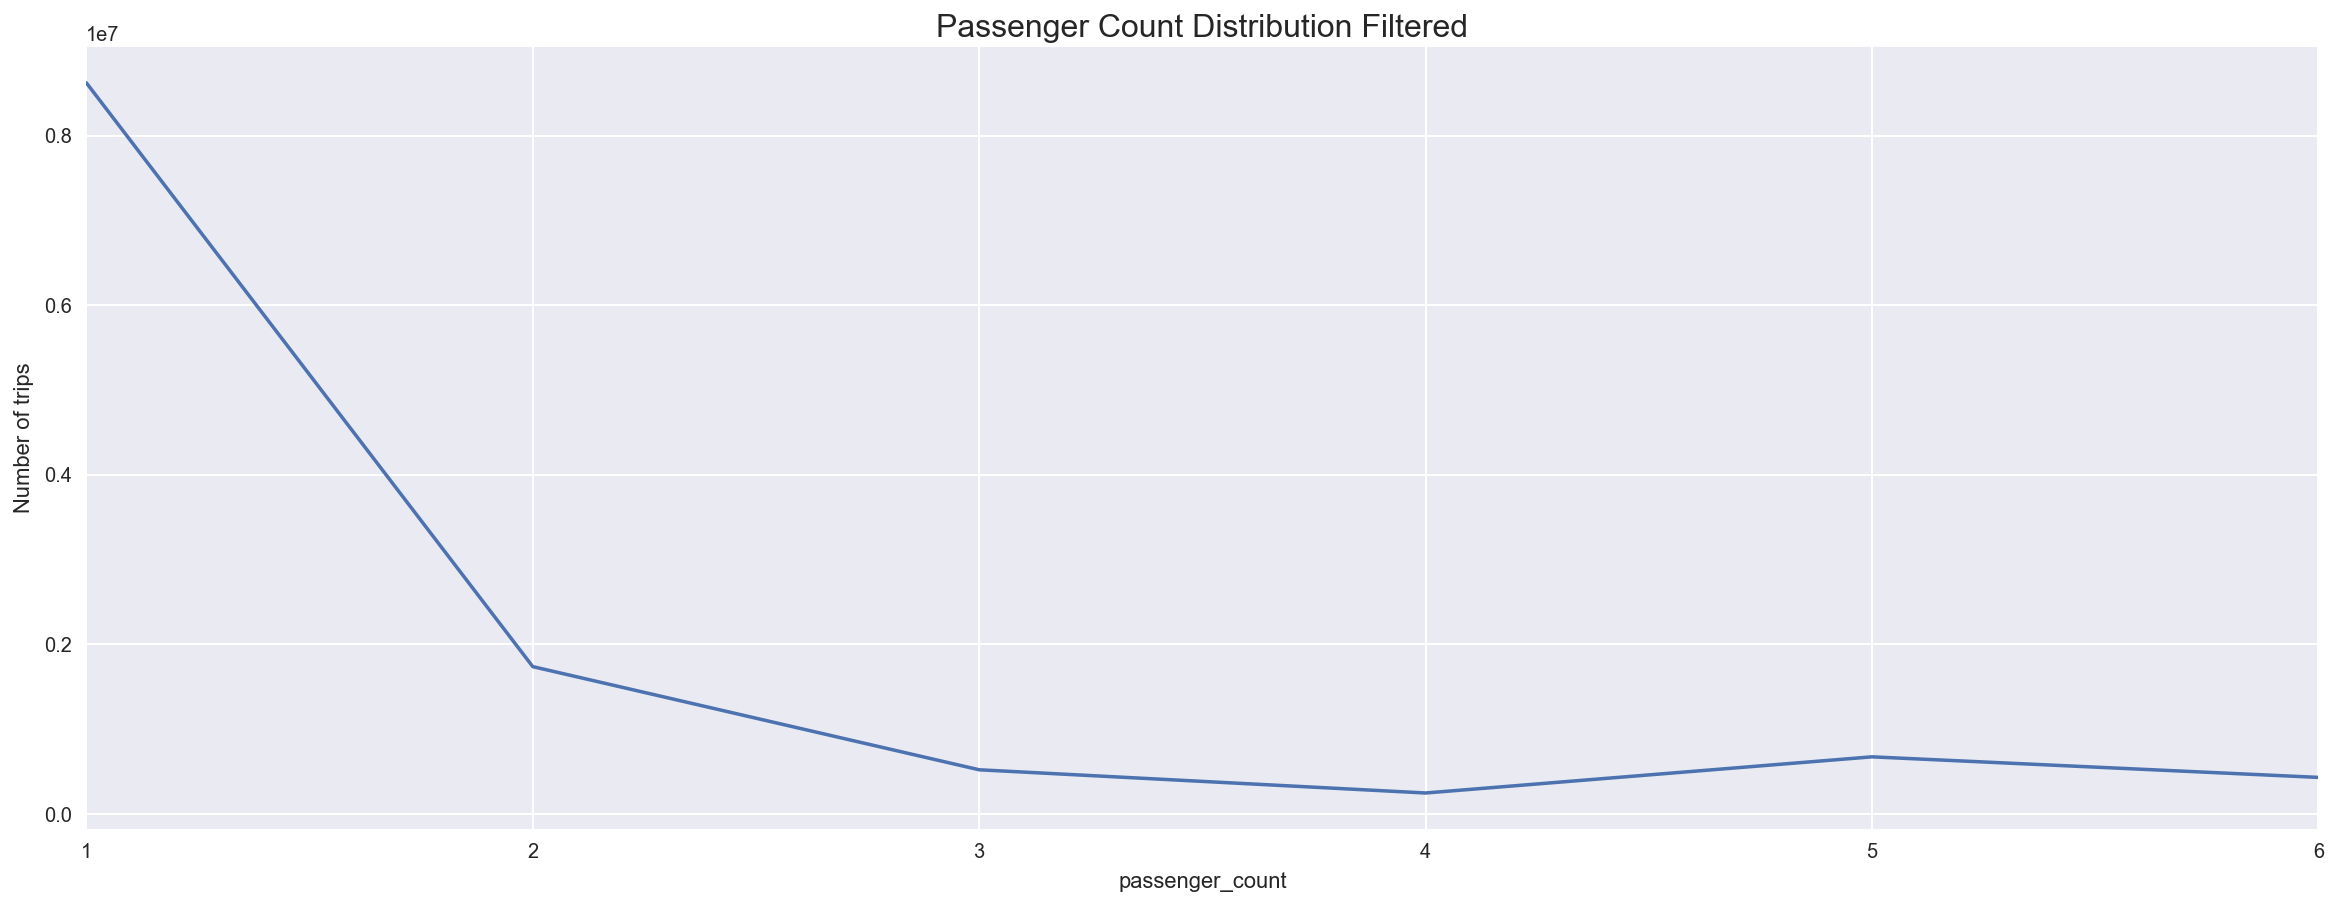

In [16]:
passenger_data = extra_data.loc[(extra_data.passenger_count >0 ) & (extra_data.passenger_count <= 6)]
passenger_filtered = passenger_data.groupby(['passenger_count']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Passenger Count Distribution Filtered', fontsize = 16)

Considering this criteria more than 1k trips do not meet this norm so they are considered outliers. 

In [17]:
print 'Trips with more than 5 passengers: ', len(extra_data) - len(passenger_data)

Trips with more than 5 passengers:  1335


# 1.3.7 Mta Tax Distribution

Mta Tax should be a fixed a fixed amount to be paid in each trip. The distribution clearly shows this judgment. However taxes commonly vary from year to year, then the range defined considers from \$0 to \$1.5

Text(0.5,1,u'Mta Tax Distribution Filtered')

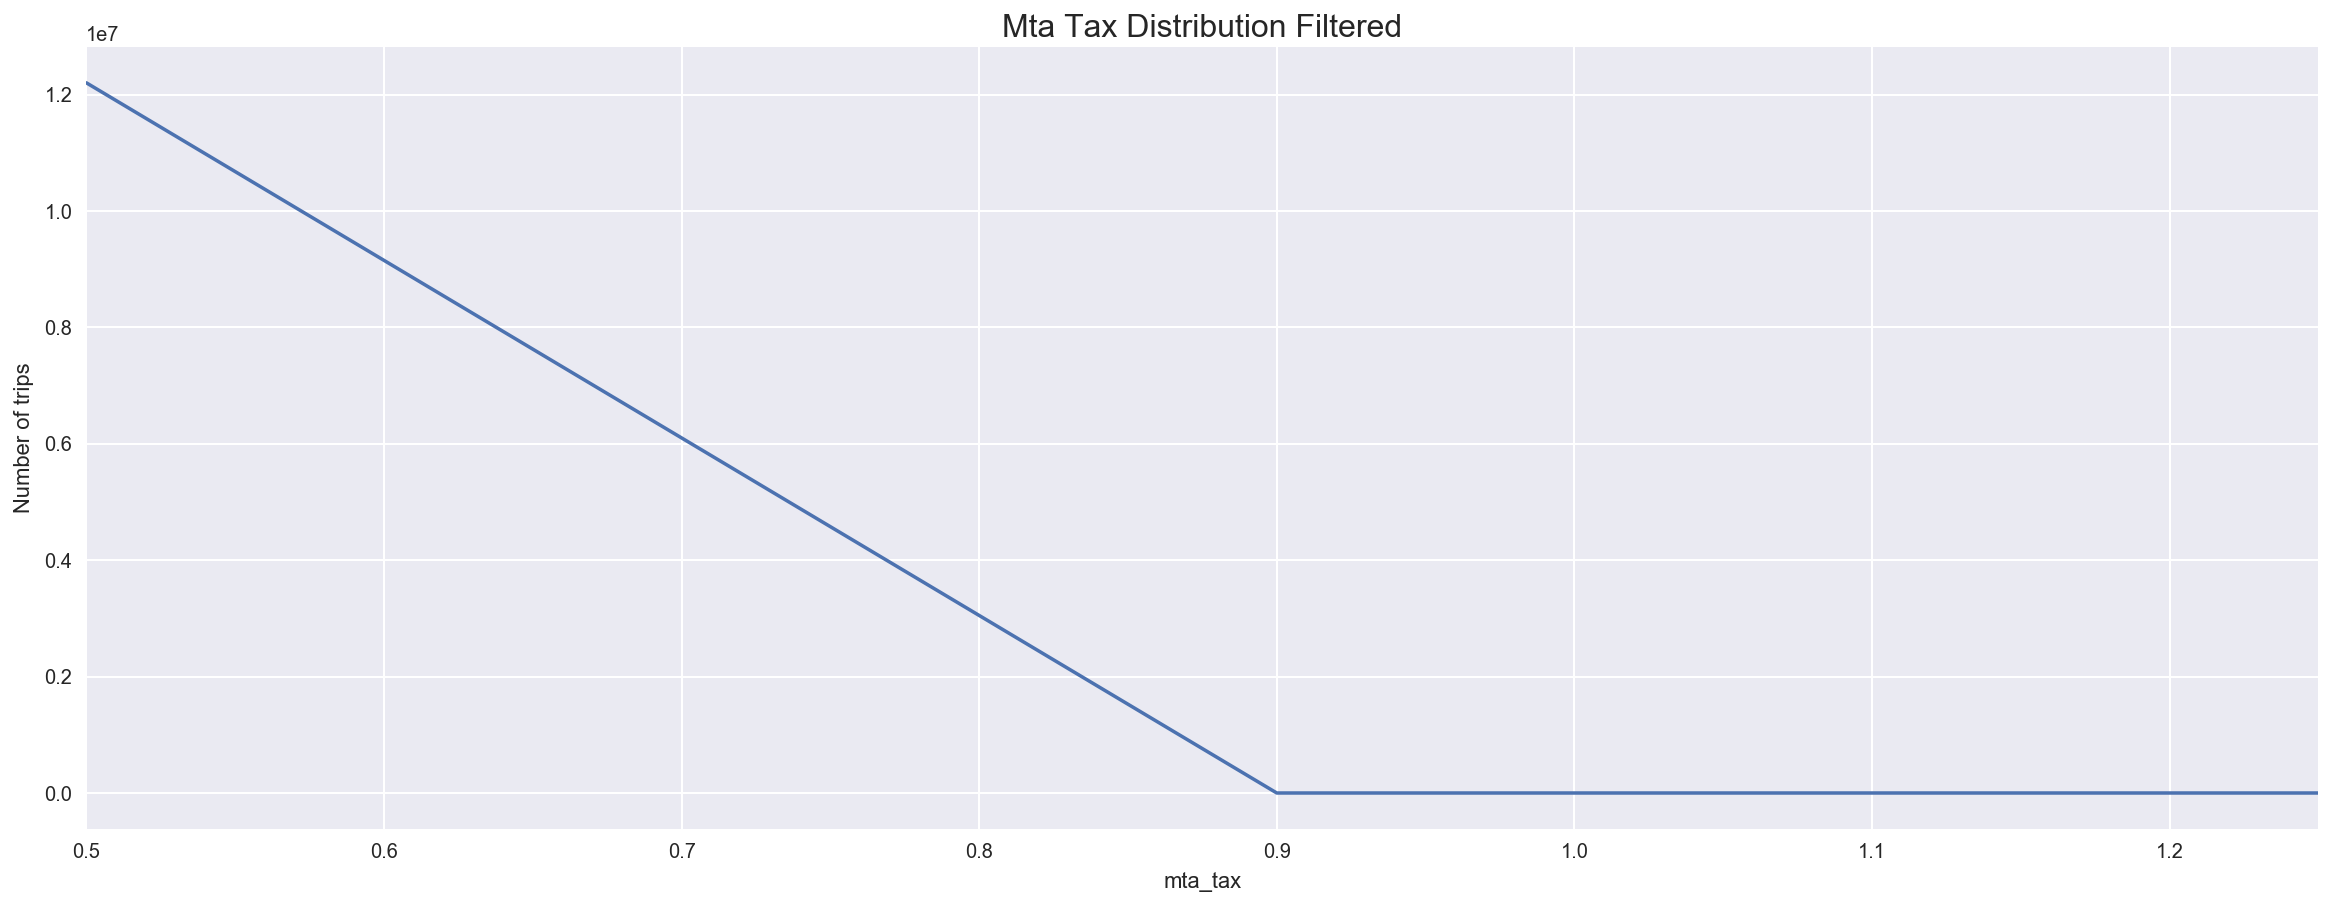

In [18]:
mta_data = passenger_data.loc[(passenger_data.mta_tax >0 ) & (passenger_data.mta_tax <= 1.5)]
passenger_filtered = mta_data.groupby(['mta_tax']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Mta Tax Distribution Filtered', fontsize = 16)

As expected, only few trips has been filtered as they are very likely to represent outliers

In [19]:
print 'Trips filtered: ', len(passenger_data) - len(mta_data)

Trips filtered:  31595


# 1.3.8 Payment Type Distribution


The distribution shown below states 4 types of payment.

Text(0.5,1,u'Payment Type Distribution Filtered')

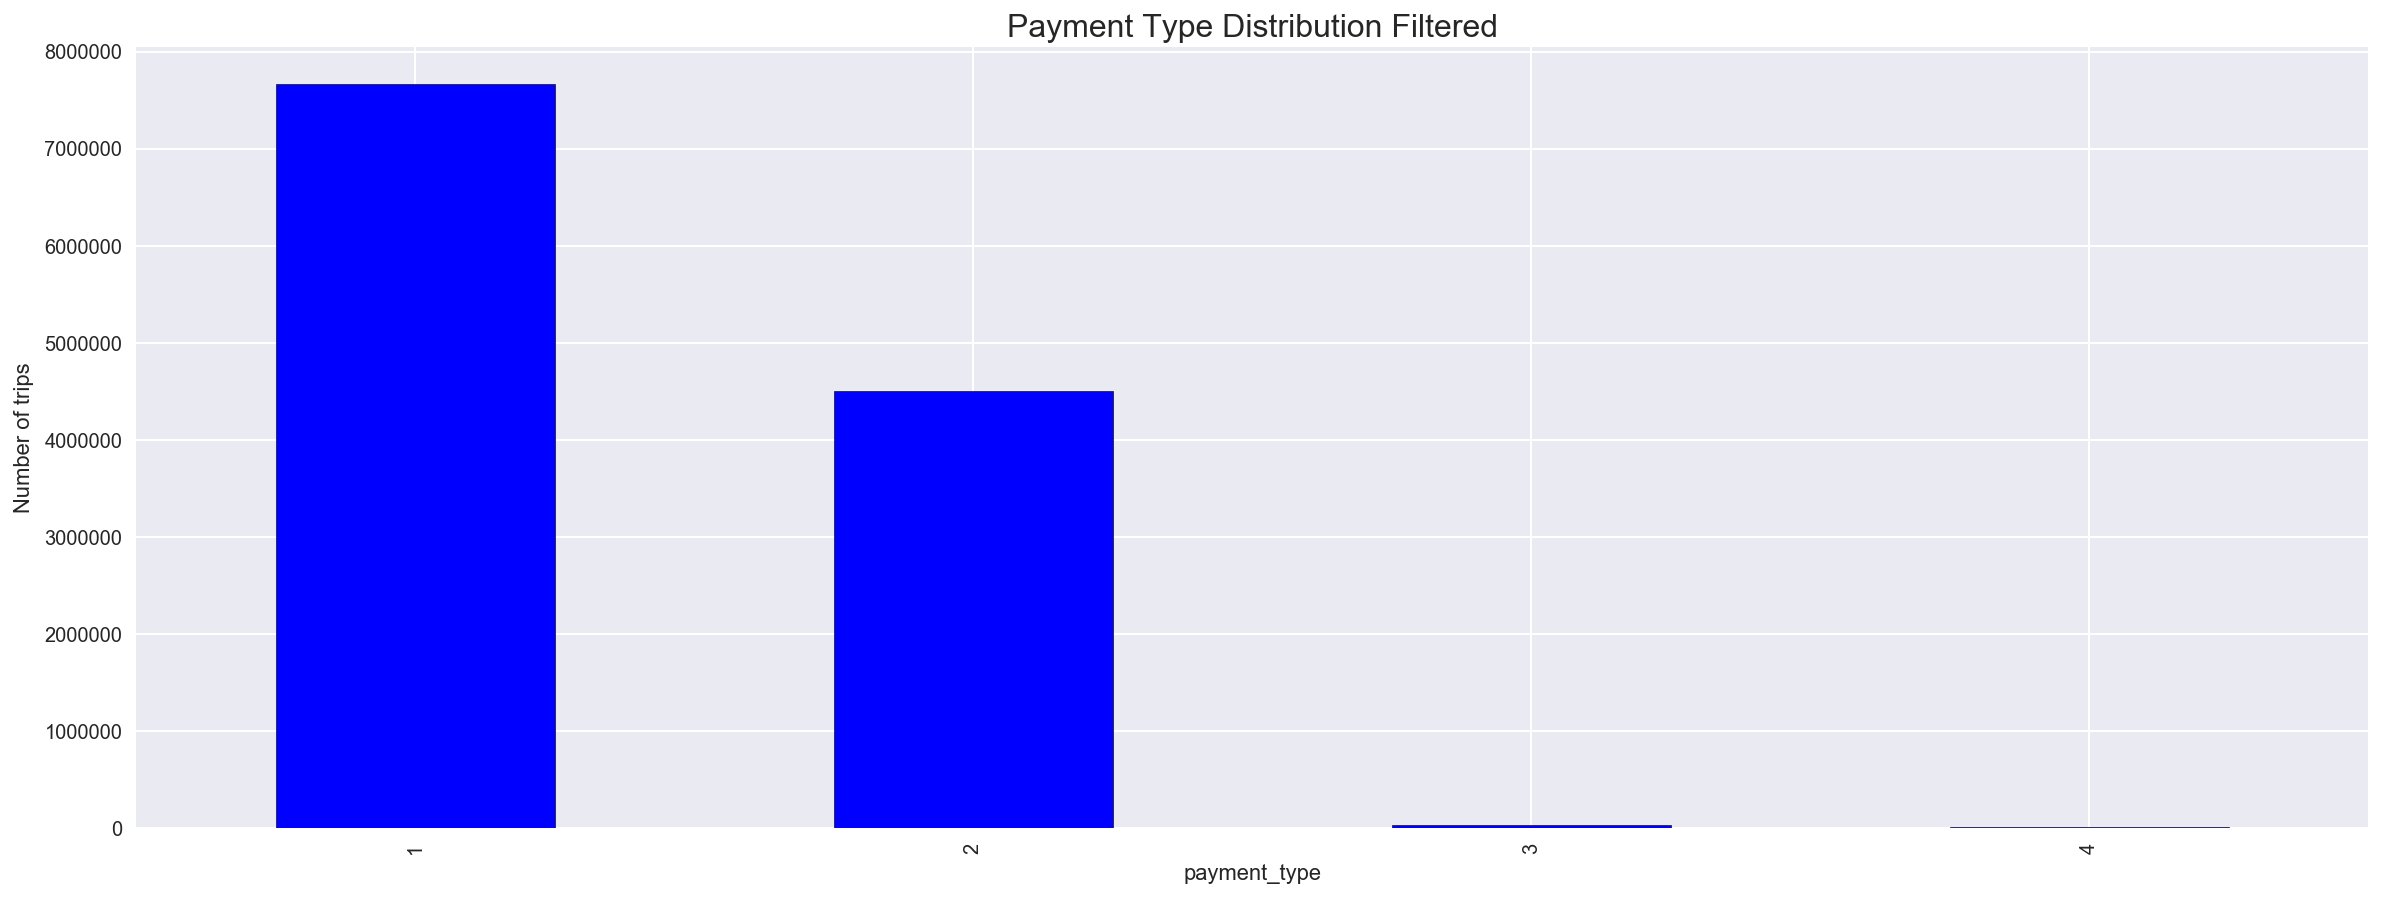

In [20]:
rawpayment_data = mta_data.loc[(mta_data.payment_type >0 ) & (mta_data.payment_type <= 4)]
payment_filtered = rawpayment_data.groupby(['payment_type']).size().plot(figsize = (20,7), kind='bar')

plt.ylabel('Number of trips')
plt.title('Payment Type Distribution Filtered', fontsize = 16)

Then, we consider that an average passenger have paid either with credit card or cash. 

Due to we do not have any idea of which of the 4 payment types represent the credit card and the cash payment, we will keep the types with the highest frequencies. It is clear that type number 1 is the most common way passengers have paid, then we will analyse the remaining types of data.

Text(0.5,1,u'Payment 2-4 Type Distribution Filtered ')

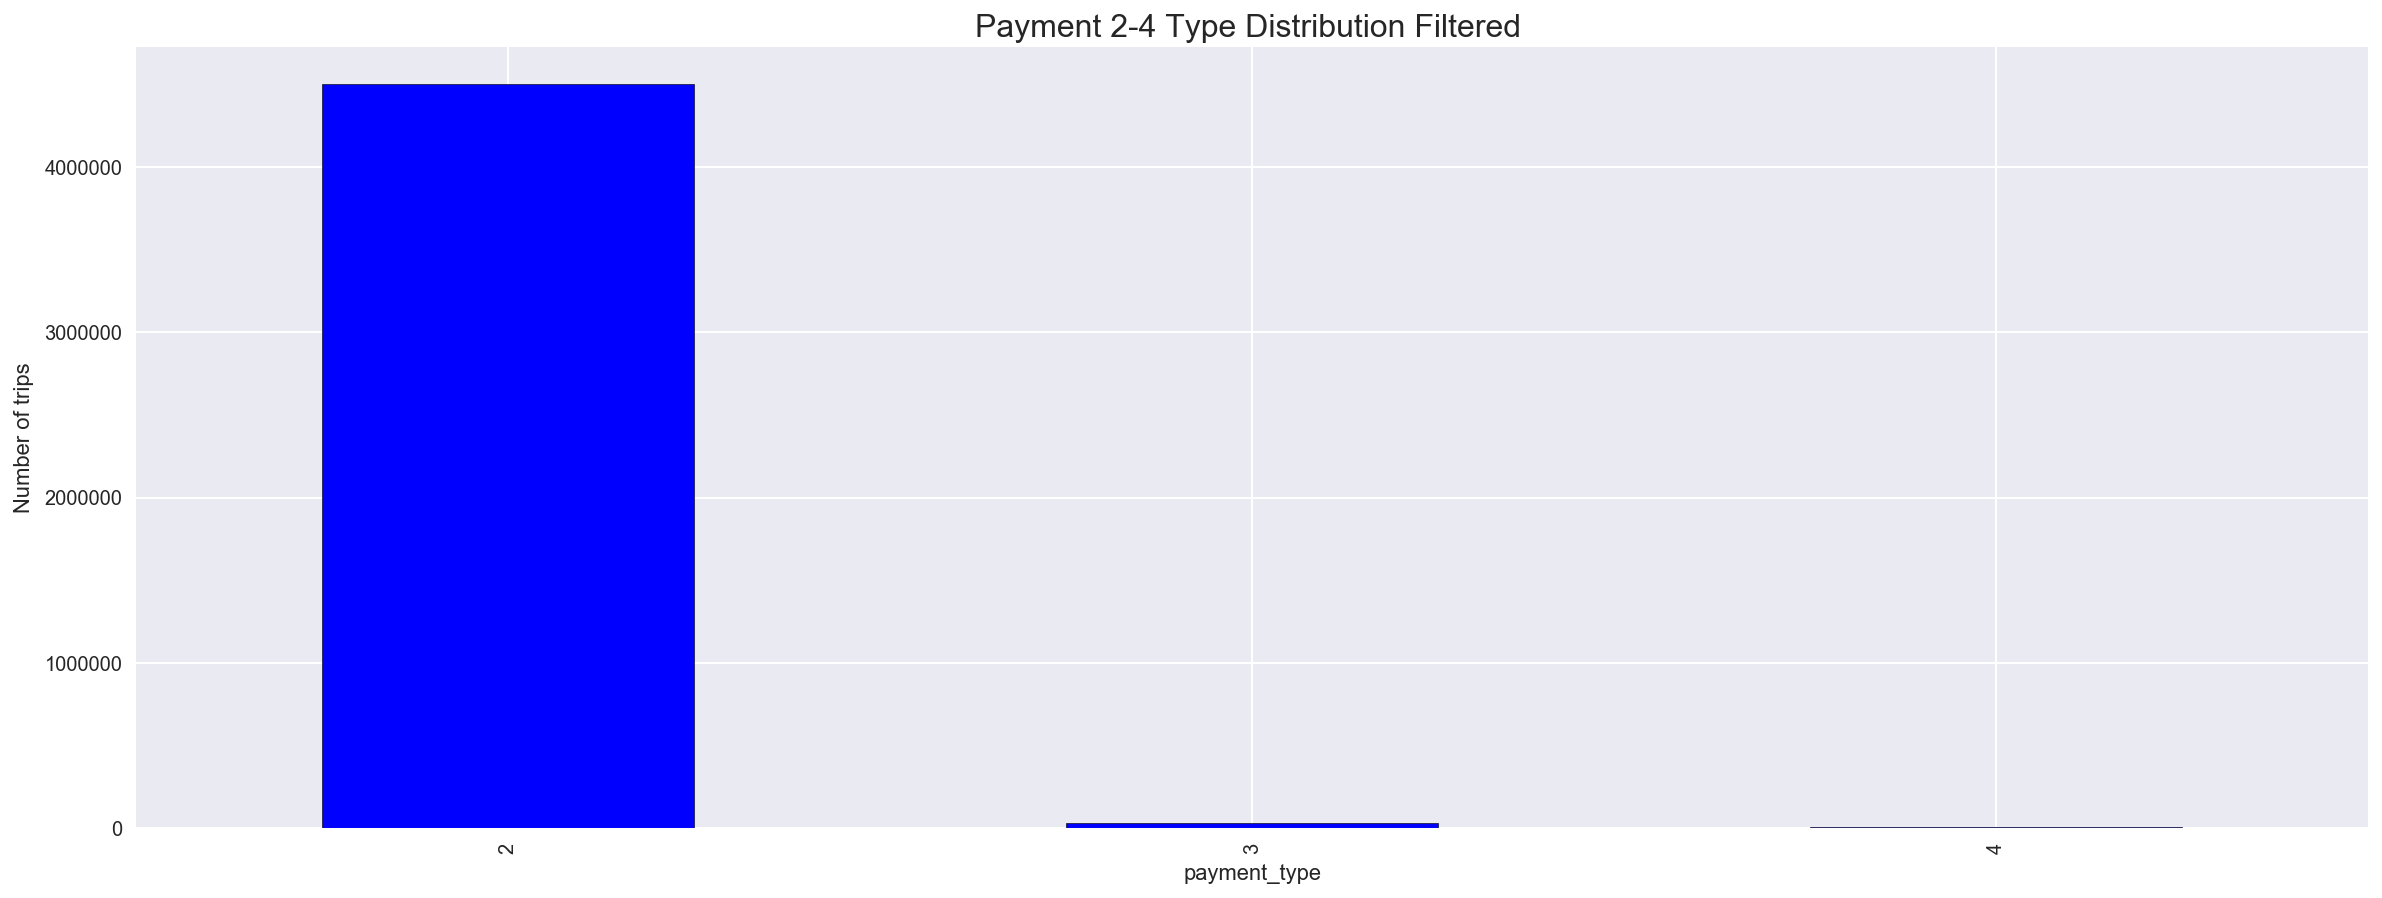

In [21]:
partpayment_data = mta_data.loc[(mta_data.payment_type >1 ) & (mta_data.payment_type <= 4)]
payment_filtered = partpayment_data.groupby(['payment_type']).size().plot(figsize = (20,7), kind='bar')

plt.ylabel('Number of trips')
plt.title('Payment 2-4 Type Distribution Filtered ', fontsize = 16)

Based on this results we consider that types 1 and 2 are payments with credit card and cash. Therefore, we assume that types 3 and 4 are outliers from this distribution.

In [22]:
payment_data = mta_data.loc[(mta_data.payment_type ==1 ) | (mta_data.payment_type == 2)]

Therefore, there are over 40k trips that seems to have wrong values.

In [23]:
print 'Trips filtered: ', len(mta_data) - len(payment_data)

Trips filtered:  41507


# 1.3.8 Drop Off Latitude Distribution



Text(0.5,1,u'Drop Off Latitude Distribution Filtered')

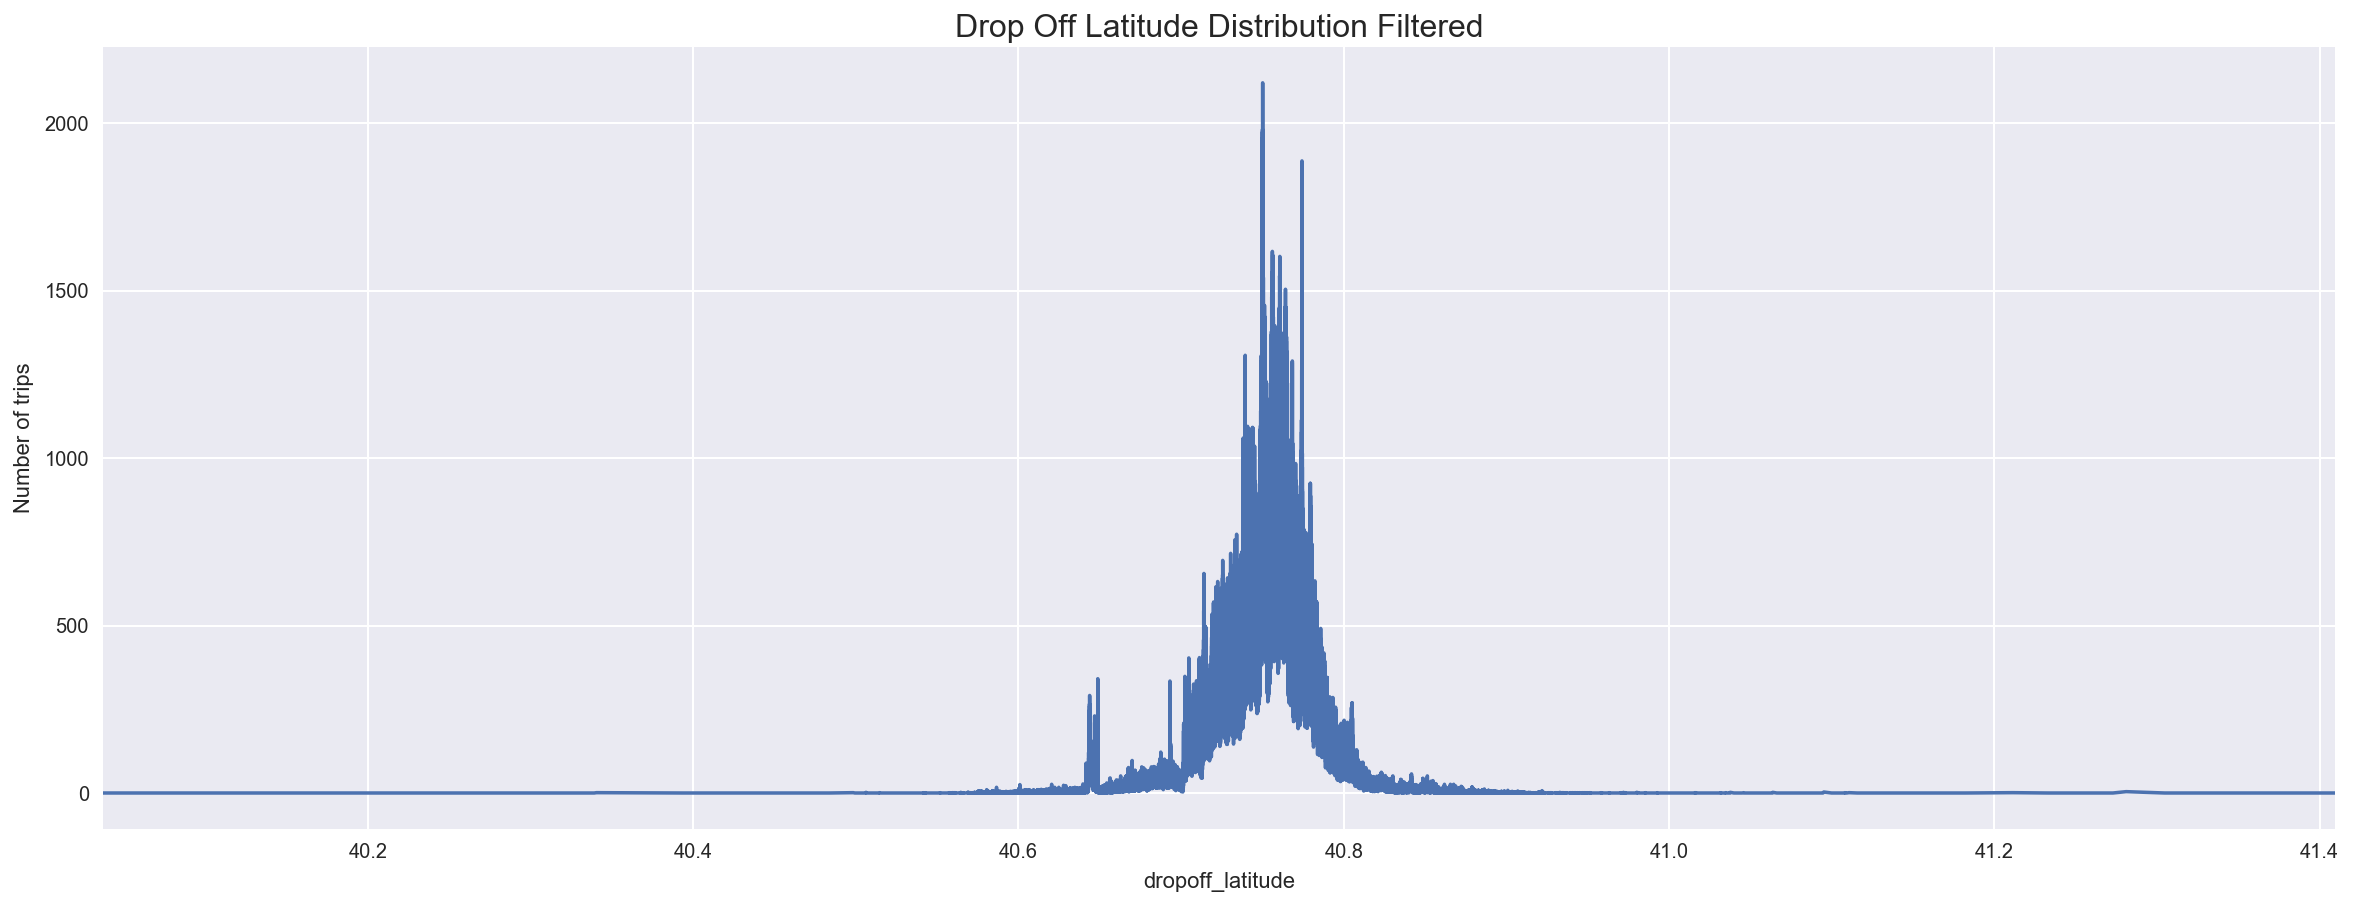

In [24]:
droplat_data = payment_data.loc[(payment_data.dropoff_latitude >= 40 ) & (payment_data.dropoff_latitude <= 41.5)]
droplat_filtered = droplat_data.groupby(['dropoff_latitude']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Drop Off Latitude Distribution Filtered', fontsize = 16)

In [25]:
print 'Trips filtered: ', len(payment_data) - len(droplat_data)

Trips filtered:  143568


# 1.3.9 Drop Off Longitude Distribution

Text(0.5,1,u'Drop Off Longitude Distribution Filtered')

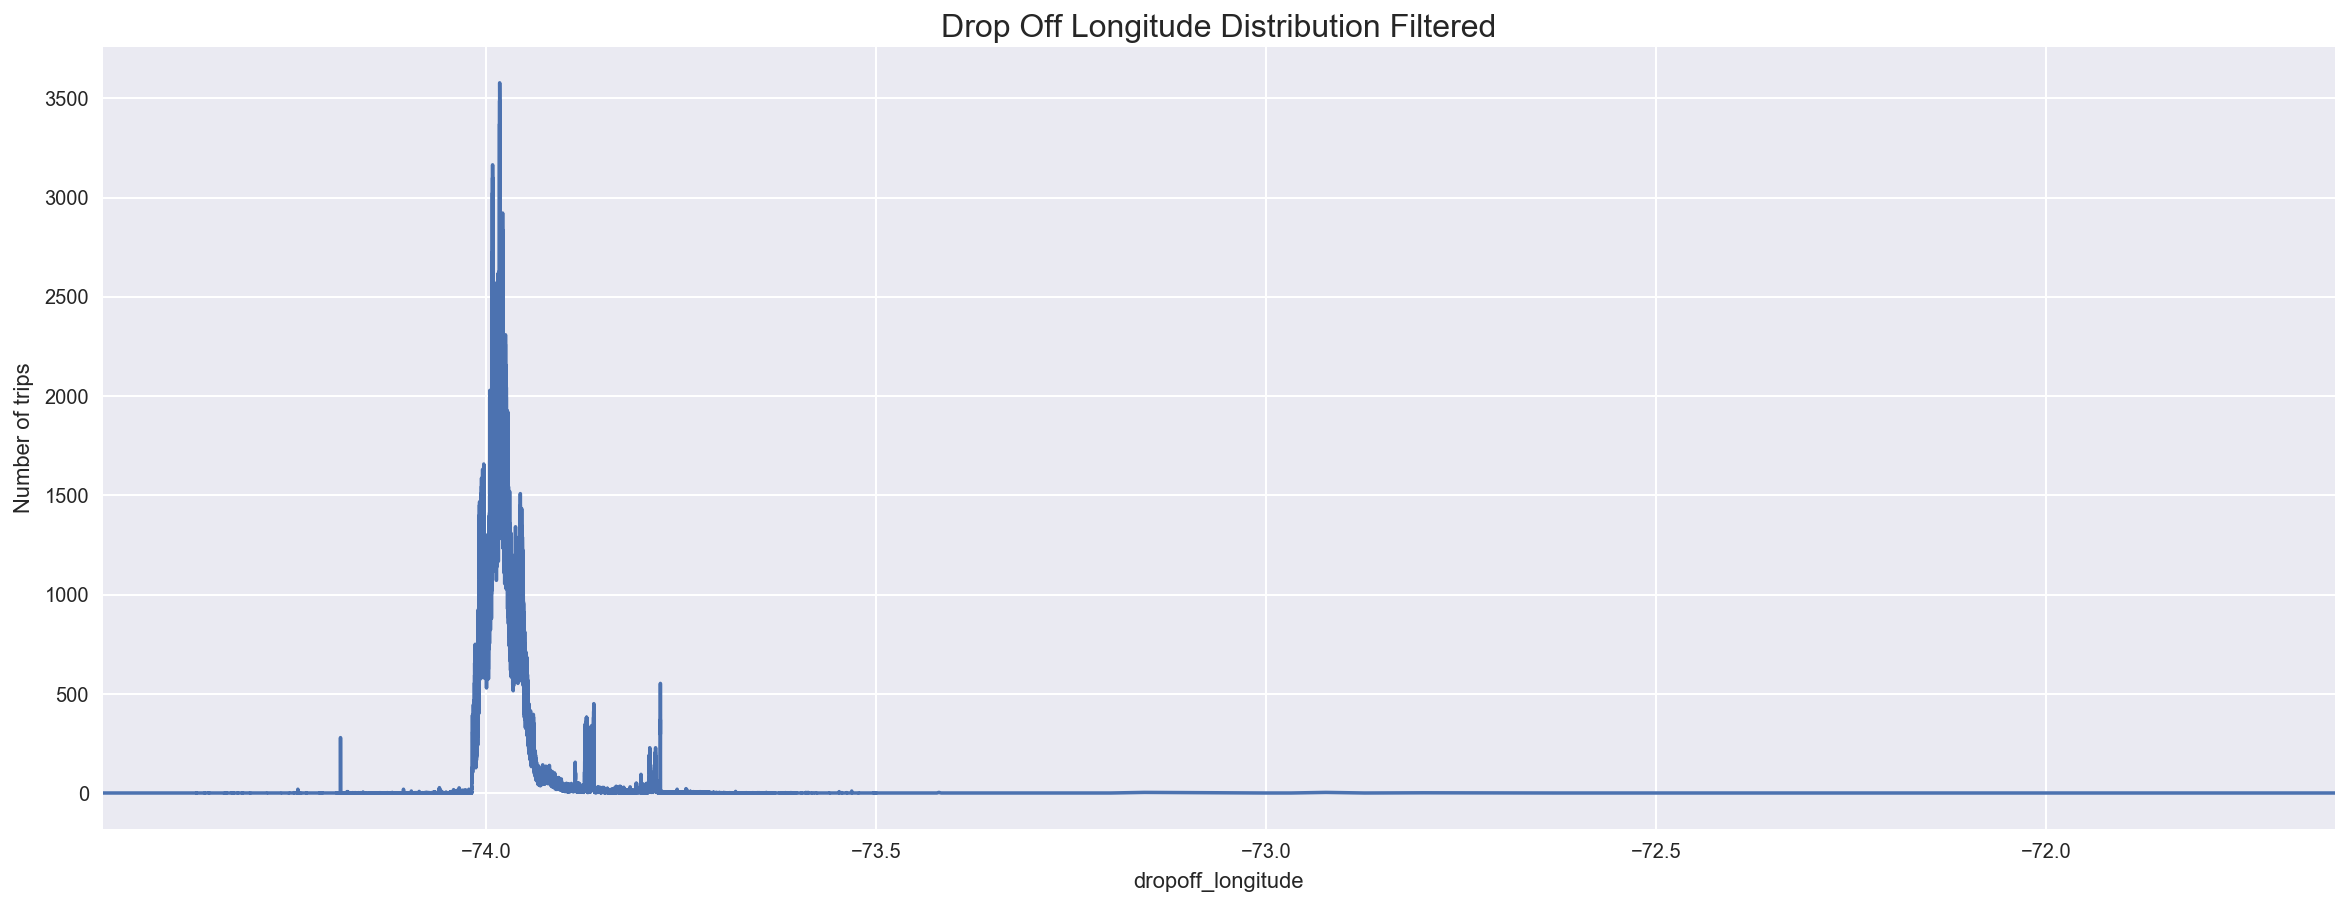

In [26]:
droplong_data = droplat_data.loc[(droplat_data.dropoff_longitude >= -74.5 ) & (droplat_data.dropoff_longitude <= -71)]
droplong_filtered = droplong_data.groupby(['dropoff_longitude']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Drop Off Longitude Distribution Filtered', fontsize = 16)

In [27]:
print 'Trips filtered: ', len(droplat_data) - len(droplong_data)

Trips filtered:  65


# 1.3.10 Pick Up Longitude Distribution  

Text(0.5,1,u'Pick Up Longitude Distribution Filtered')

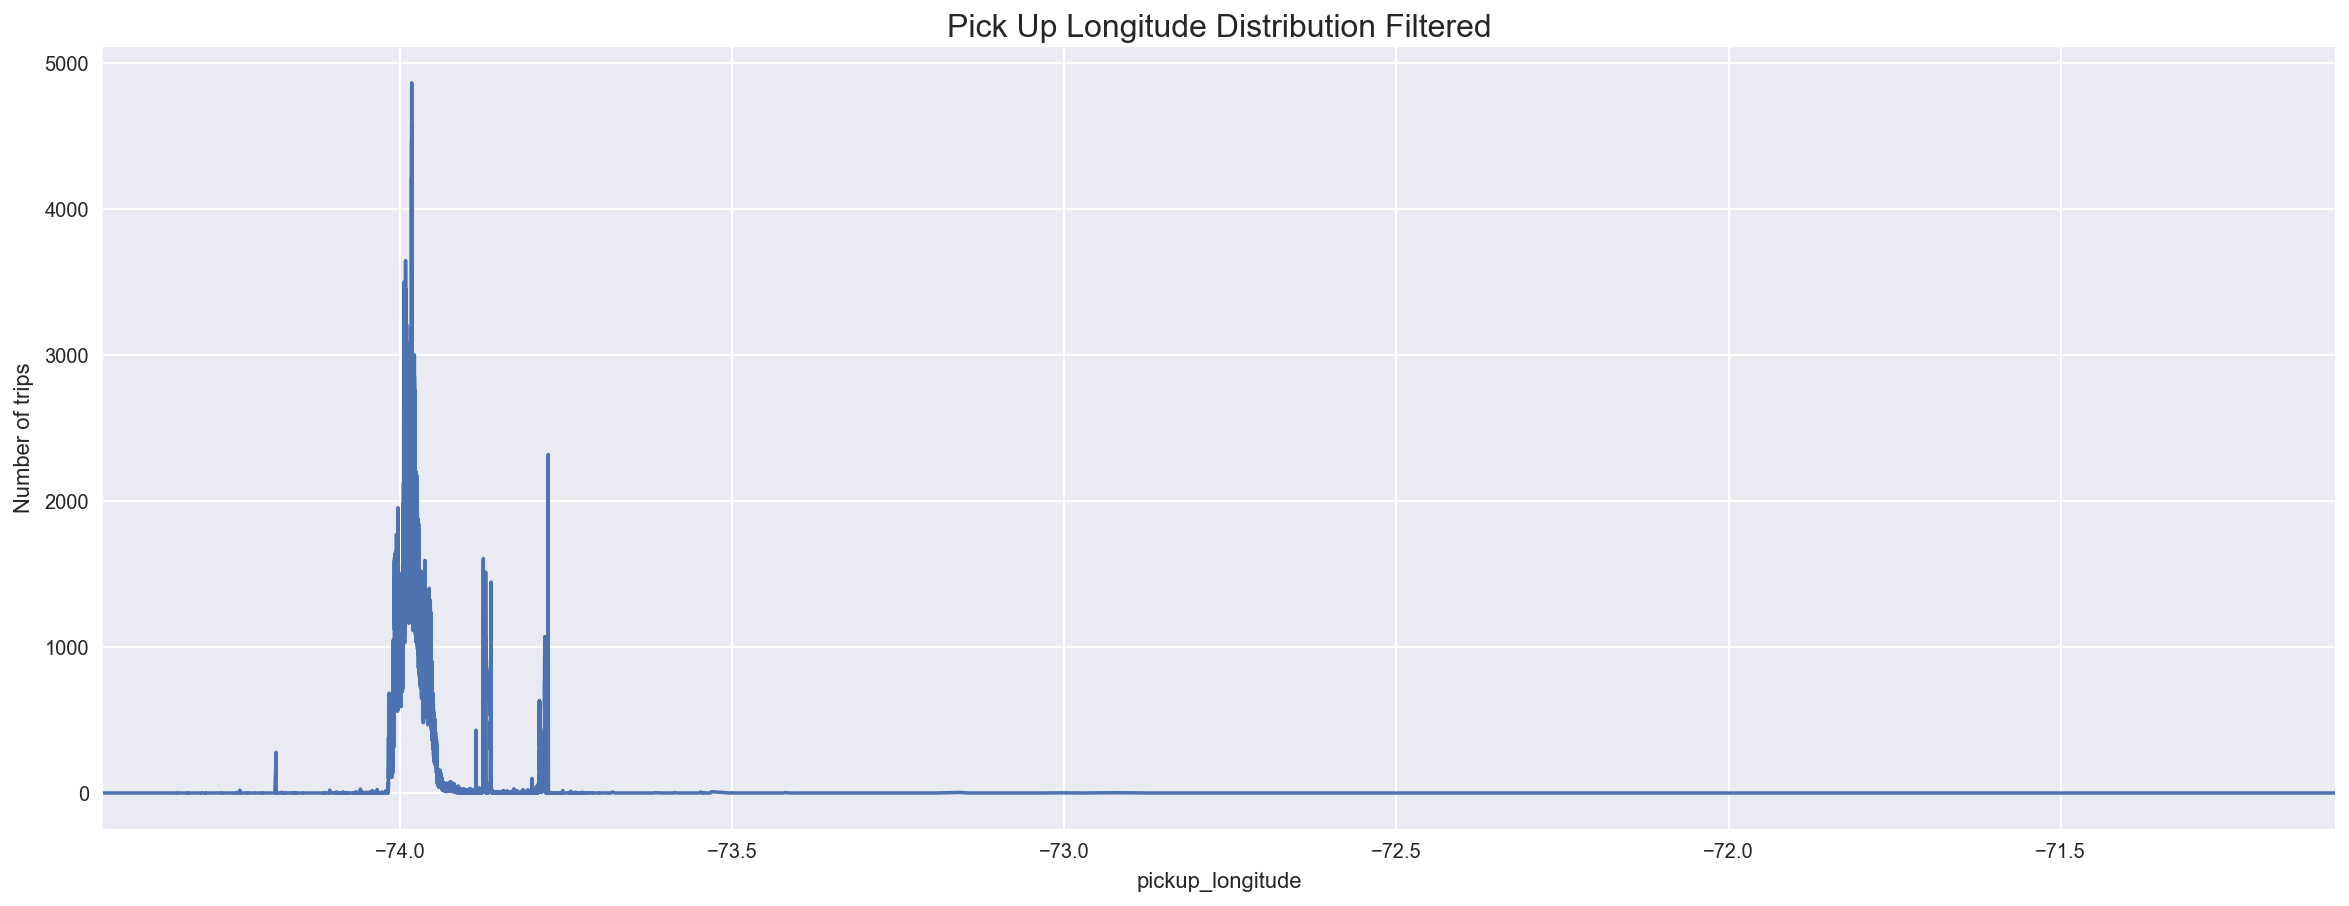

In [28]:
picklong_data = droplong_data.loc[(droplong_data.pickup_longitude >= -74.5 ) & (droplong_data.pickup_longitude <= -71)]
pickuplong_filtered = picklong_data.groupby(['pickup_longitude']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Pick Up Longitude Distribution Filtered', fontsize = 16)

In [29]:
print 'Trips filtered: ', len(droplong_data) - len(picklong_data)

Trips filtered:  23025


# 1.3.11 Pick Up Latitude Distribution

Text(0.5,1,u'Pick Up Latitude Distribution Filtered')

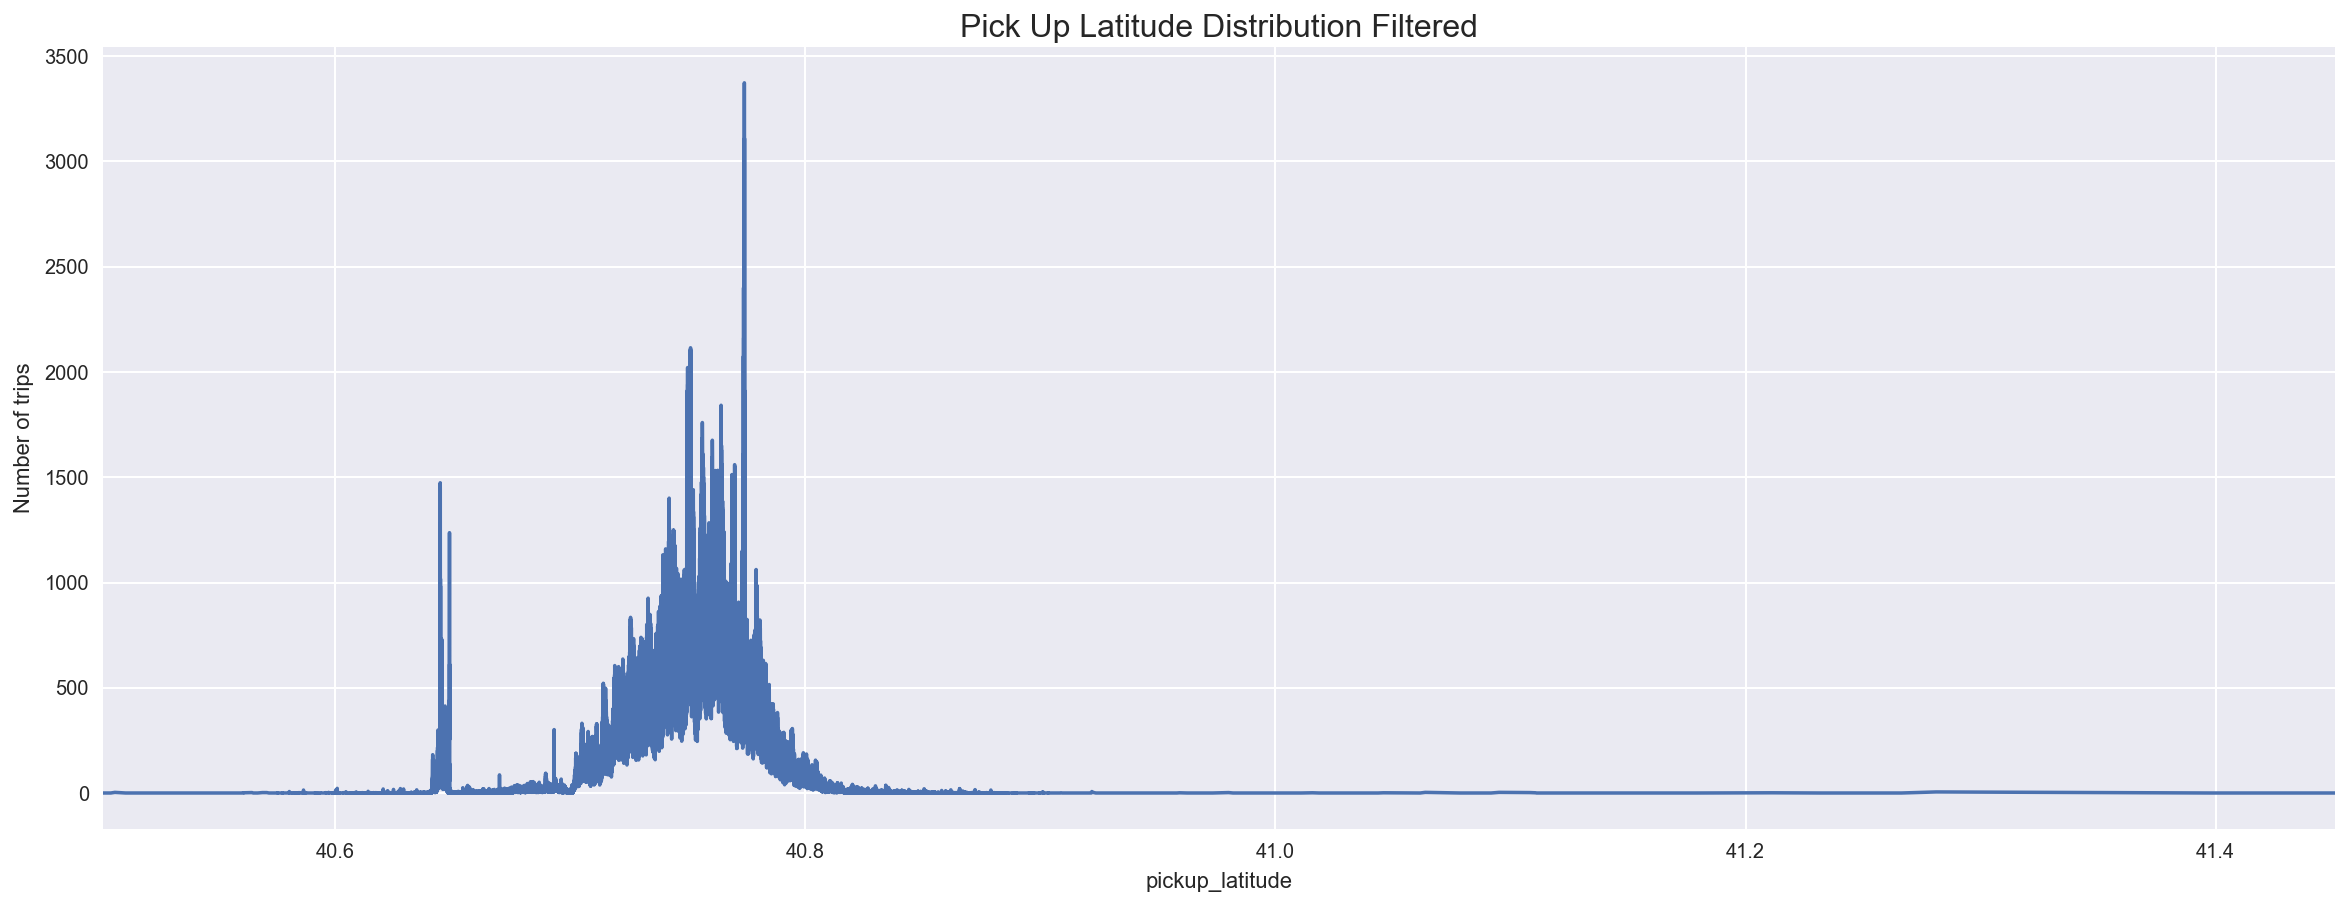

In [30]:
picklat_data = picklong_data.loc[(picklong_data.pickup_latitude >= 40.5 ) & (picklong_data.pickup_latitude <= 41.5)]
pickuplat_filtered = picklat_data.groupby(['pickup_latitude']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Pick Up Latitude Distribution Filtered', fontsize = 16)

In [31]:
print 'Trips filtered: ', len(picklong_data) - len(picklat_data)

Trips filtered:  46


# 1.3.12  Total Amount Distribution

Text(0.5,1,u'Total Amount Distribution Filtered')

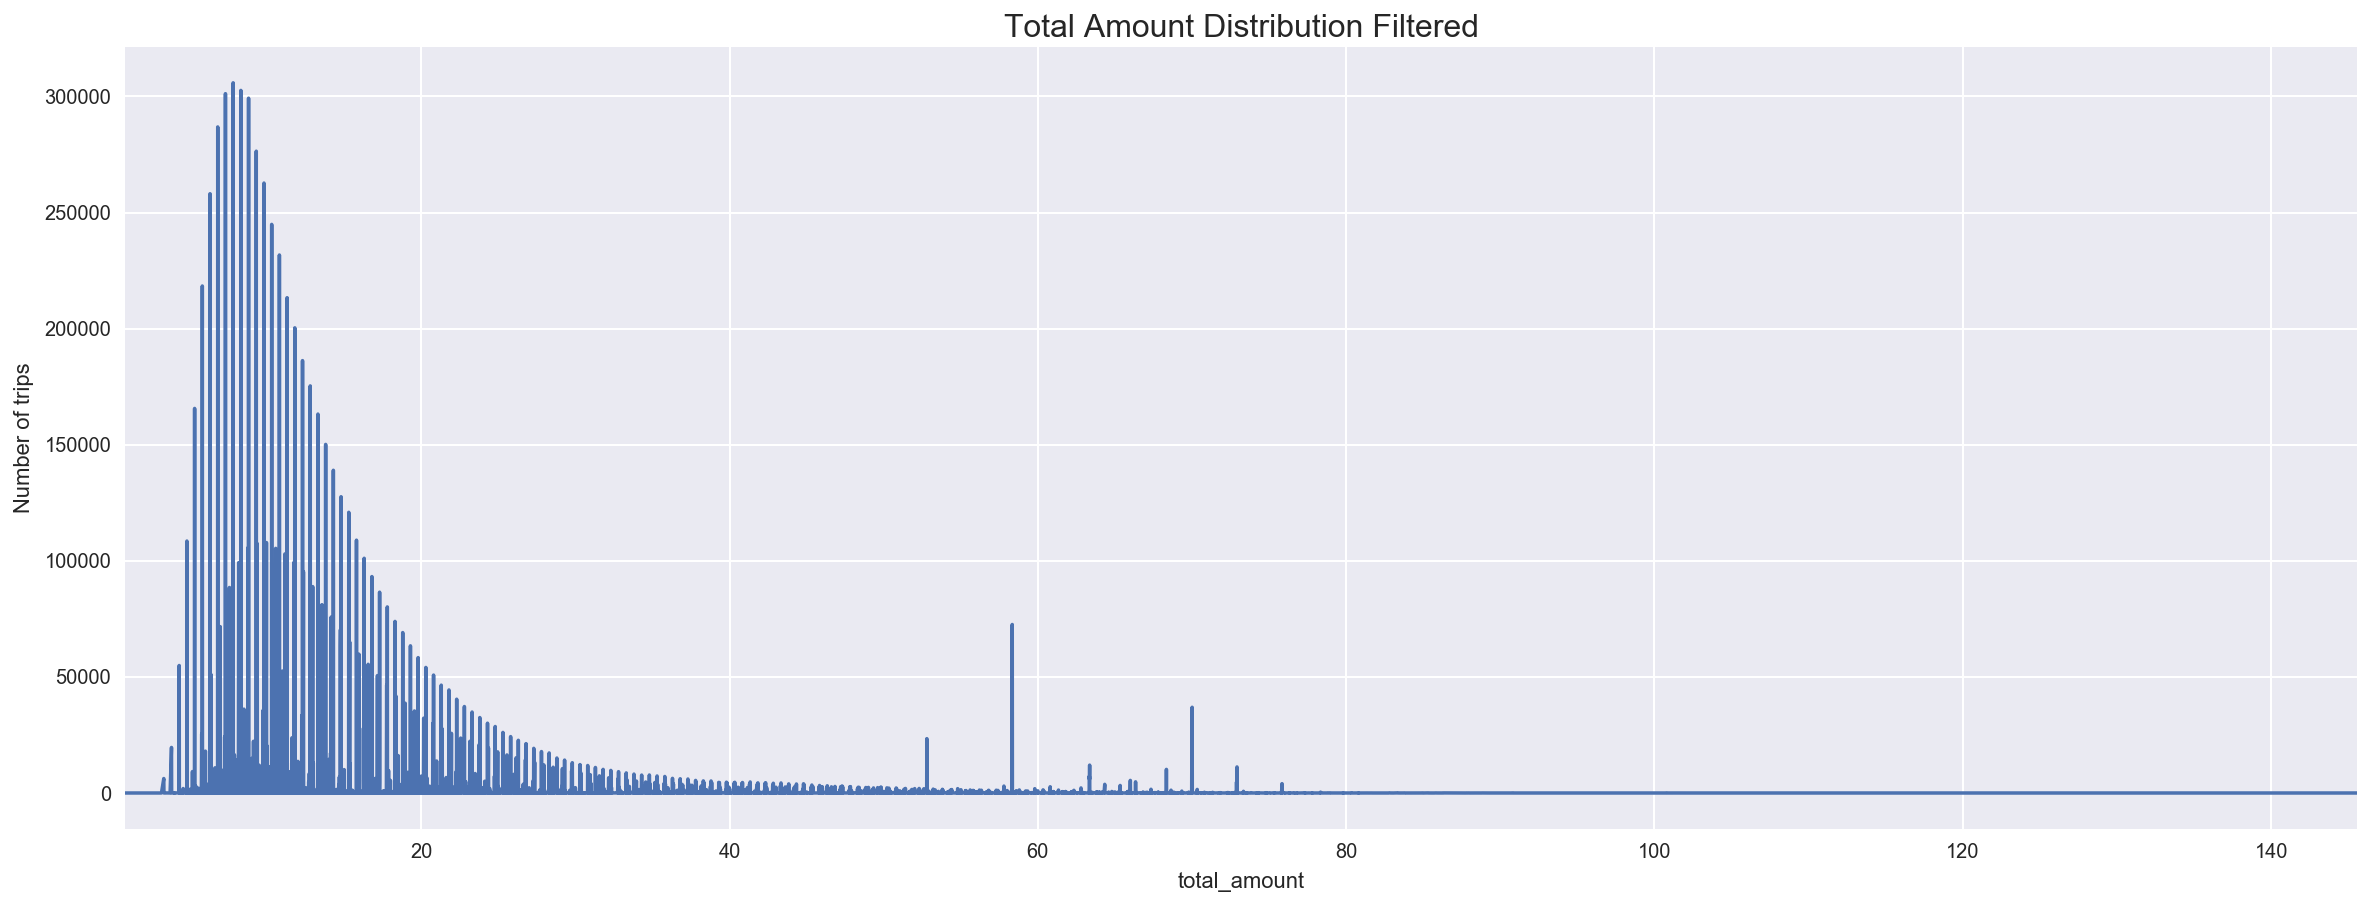

In [80]:
amount_data = picklat_data.loc[(picklat_data.total_amount > 0 ) & (picklat_data.total_amount <= 150)]
pickuplat_filtered = amount_data.groupby(['total_amount']).size().plot(figsize = (20,7))

plt.ylabel('Number of trips')
plt.title('Total Amount Distribution Filtered', fontsize = 16)

The number of outliers found is 25.

In [81]:
print 'Trips filtered: ', len(picklat_data) - len(amount_data)

Trips filtered:  25


# 1.3.13 Rate Code ID Distribution

Text(0.5,1,u'Rate Code ID Distribution Filtered')

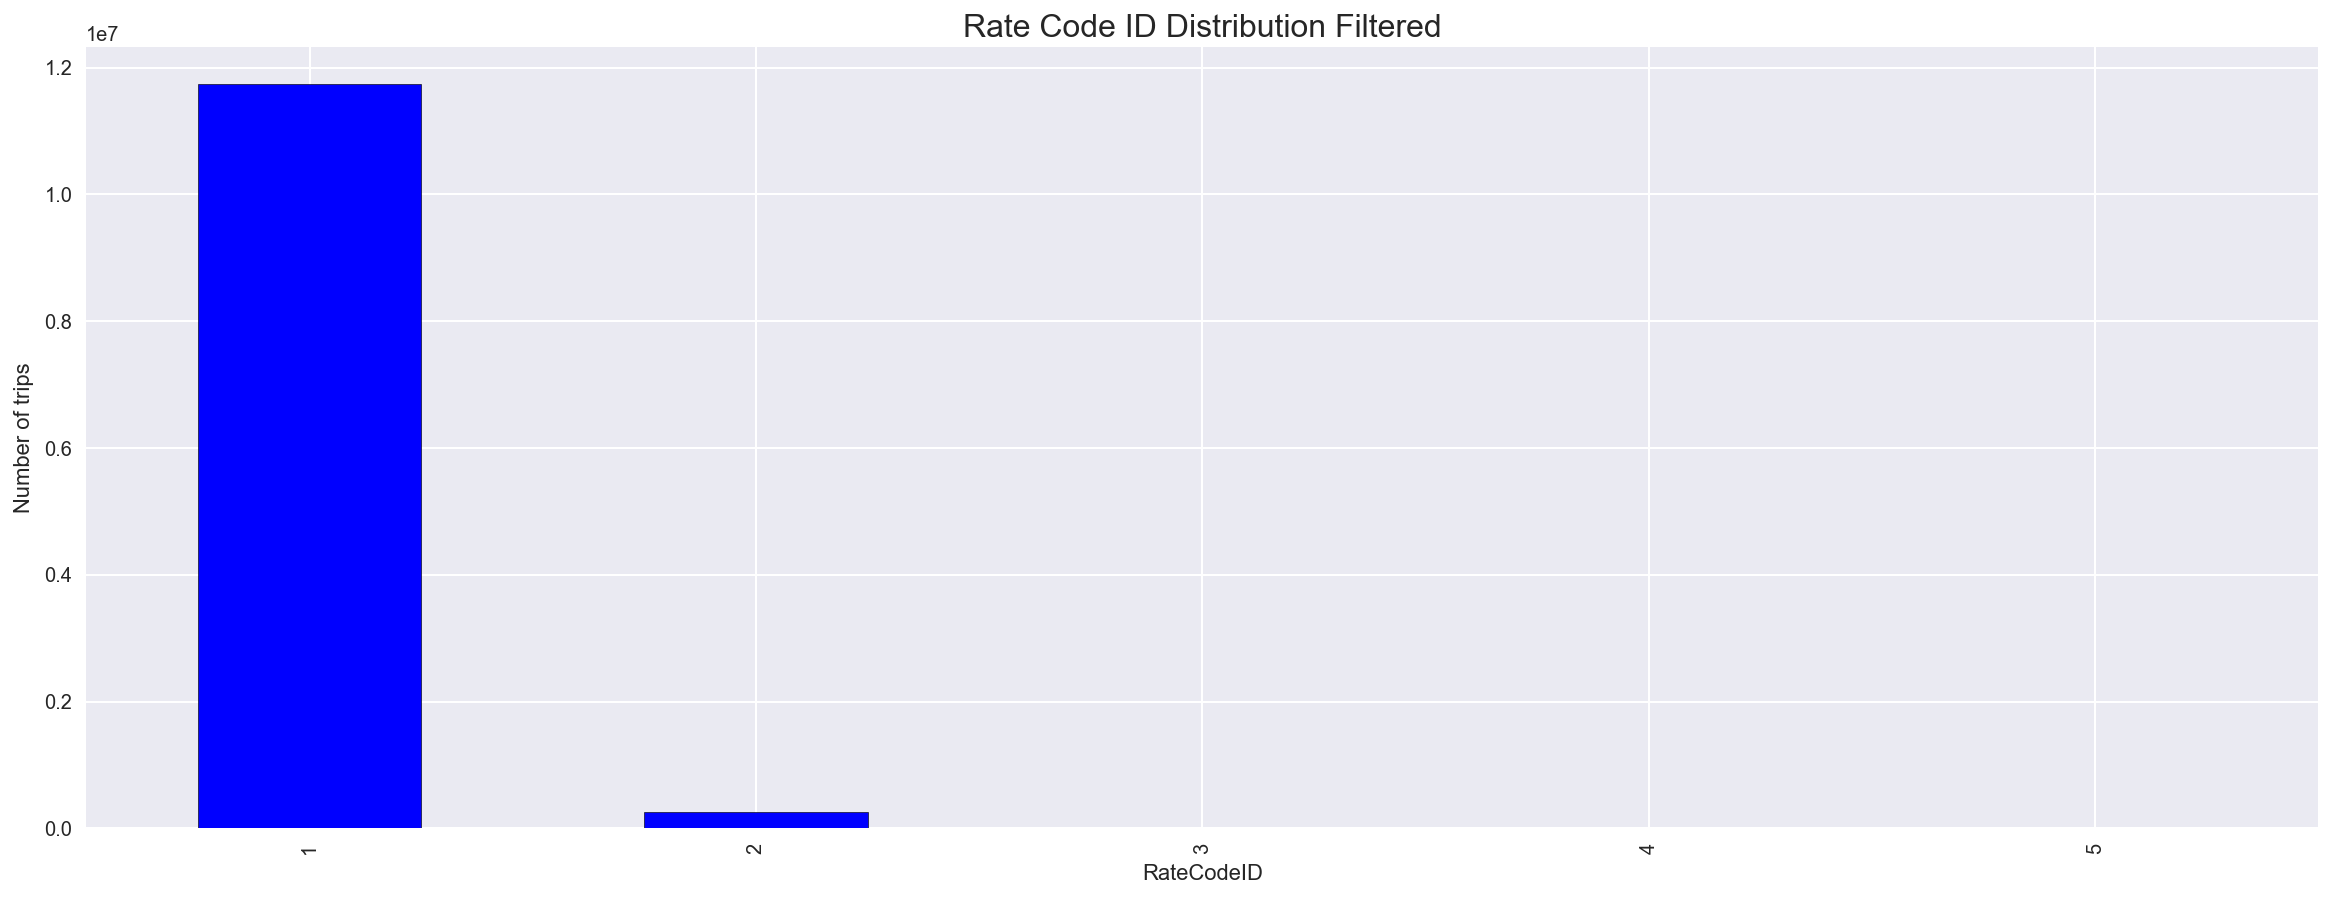

In [115]:
rateid_data = amount_data.loc[(amount_data.RateCodeID >= 1 )  & (amount_data.RateCodeID <= 5)]
pickuplat_filtered = rateid_data.groupby(['RateCodeID']).size().plot(figsize = (20,7), kind='bar')

plt.ylabel('Number of trips')
plt.title('Rate Code ID Distribution Filtered', fontsize = 16)

In [116]:
print 'Trips filtered: ', len(amount_data) - len(rateid_data)

Trips filtered:  172


# 1.4  Summary of the Data Exploration

Once the most relevant information has been captured we can notice more consistency within the distirbution of most of the fields contained in the dataset.

The following map below shows the cleaned dataset. The dot points included in the map represent the drop off location of the trips contained in this dataset. Most of the locations seems to be congruent with the limits of the NYC area.

In [120]:
cleaned_dataset = rateid_data

In [ ]:
cleaned_dataset.to_csv('cleaned_yellow_tripdata_2015-06.csv', index=True)

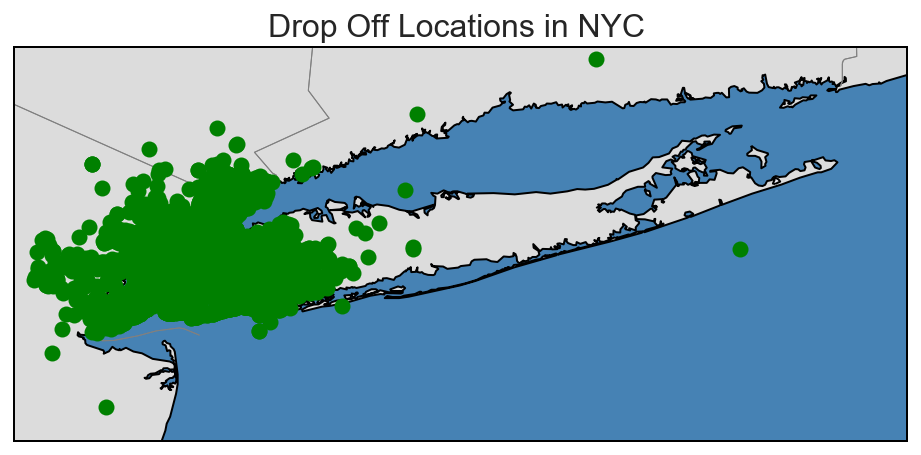

In [121]:
themap = Basemap(projection='gall',
              llcrnrlon = -74.495186,              # lower-left corner longitude
              llcrnrlat = 40.150002,               # lower-left corner latitude
              urcrnrlon = -71.63005,               # upper-right corner longitude
              urcrnrlat = 41.450764,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 1.0,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')
themap.drawstates(color='0.5')

drop_x = [i for i in cleaned_dataset['dropoff_longitude']]
drop_y = [i for i in cleaned_dataset['dropoff_latitude']]

dropoff_longitude, dropoff_latitude = themap(drop_x[503435:3454678] , drop_y[503435:3454678])
pickup_longitude, pickup_latitude = themap(pick_x[-50:] , pick_y[-50:])

themap.plot(dropoff_longitude, dropoff_latitude, 
            'o',                    # marker shape
            color='green',         # marker colour
            markersize=8            # marker size
            )


plt.title('Drop Off Locations in NYC ', fontsize = 16)
plt.show()

Moreover, the statistical analysis of the cleaned dataset, shows more consistency within the distribution of each of the fields registered.

In [122]:
cleaned_dataset.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000,11995646.000000
mean,1.529747,1.688235,2.992838,-73.973635,40.750791,1.023393,-73.973279,40.751614,1.369796,12.937489,0.324744,0.500000,1.706318,0.286171,0.299974,16.054889
std,0.499114,1.341648,3.559639,0.038194,0.027833,0.168078,0.034458,0.031577,0.482749,10.027843,0.364504,0.000245,2.277040,1.245894,0.002814,12.278828
min,1.000000,1.000000,0.010000,-74.446938,40.501221,1.000000,-74.490715,40.150002,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.800000
25%,1.000000,1.000000,1.040000,-73.992050,40.737362,1.000000,-73.991364,40.736217,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000
50%,2.000000,1.000000,1.760000,-73.981819,40.753925,1.000000,-73.979927,40.754410,1.000000,9.500000,0.000000,0.500000,1.200000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.220000,-73.967514,40.768261,1.000000,-73.963593,40.769169,2.000000,15.000000,0.500000,0.500000,2.360000,0.000000,0.300000,18.300000
max,2.000000,6.000000,40.000000,-71.669174,41.450764,5.000000,-71.630051,41.409260,2.000000,100.000000,8.500000,1.250000,30.000000,20.000000,0.700000,145.590000


In summary, we have filtered more than 2.6% of the total number of trips we had initially. 

In [123]:

raw_trips = len(raw_data)
representative_trips = len(cleaned_dataset)
outliers_per = 100 - float(representative_trips) / raw_trips * 100

print 'Number of trips in the raw dataset: ', raw_trips
print 'Number of trips in the cleand dataset: ', representative_trips
print 'Porcentage of outliers contained in the raw dataset: ',  "%.2f" % outliers_per , "%"

Number of trips in the raw dataset:  12324935
Number of trips in the cleand dataset:  11995646
Porcentage of outliers contained in the raw dataset:  2.67 %
